# Text Mining Project - Stock Sentiment - Test Notebook

## *Predicting market behavior from tweets*

### Group 42

Carolina Pinto - 20240494 <br>
Fábio dos Santos - 20240678 <br>
Guilherme Cordeiro – 20240527 <br>
Mariana Sousa – 20240516 <br>

## Table of Contents
- [1. Import Libraries](#1-import-libraries)
   - [1.1. Google Colab Setup](#11-google-colab-setup)
- [2. Data Integration](#2-data-integration)
   - [2.1 Data Description](#21-data-description)
- [3. Data Content](#3-data-content)
- [4. Data Exploration](#4-data-exploration)
   - [4.1. Class Distribution](#41-class-distribution)
   - [4.2. Text Length](#42-text-length)
   - [4.3. Data Manipulation for Further Exploration](#43-data-manipulation-for-further-exploration)
   - [4.4. Most Frequent Words per Label](#44-most-frequent-words-per-label)
   - [4.5. Word Cloud by Label](#45-word-cloud-by-label)
- [5. Corpus Split](#5-corpus-split)
- [6. Data Preprocessing](#6-data-preprocessing)
- [7. Feature Engineering](#7-feature-engineering)
   - [7.1. Bag of Words (BoW)](#71-Bag-of-Words-BoW)
   - [7.2. Word2vec](#72-Word2vec)
   - [7.3. Word Vectors with Glove (Pretrained Word Vectors)](#73-Word-Vectors-with-Glove-Pretrained-Word-Vectors)
   - [7.4. Transformers (Encoders for Feature Engineering)](#74-Transformers-Encoders-for-Feature-Engineering)
- [8. Classification Models](#8-classification-models)
   - [8.1. KNN Classifier, Logistic Regression](#81KNN-Classifier-Logistic-Regression)
      - [8.1.1. KNN](#811KNN)
      - [8.1.2. Logistic Regression](#812Logistic-Regression)
      - [8.1.3. Feature Engineering](#81KNN-feature-engineering)
   - [8.2. RNN & LSTM](#82-RNN-LSTM)
   - [8.3. Transformers](#83-Transformers)
      - [8.3.1. RoBERTa](#831-RoBERTa)
      - [8.3.2. XLM RoBERTa](#832-XLM-RoBERTa)
      - [8.3.3. FinBERT](#833-FinBERT)
      - [8.3.4. DistilBERT Cased](#834-DistilBERT-Cased)
      - [8.3.5. BART](#835-BART)
- [9. Evaluation](#9-evaluation)

# 1. Import libraries

`Step 1` Import the required libraries.

In [ ]:
from tm_utils_42 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import re
from sklearn.model_selection import train_test_split
import string
from tqdm import tqdm

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import gensim.downloader
import gensim.downloader as api
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

from keras.models import Model
from keras import layers
from keras.metrics import AUC, F1Score, CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Bidirectional, Dropout, Dense, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow.keras as keras
from keras_preprocessing.sequence import pad_sequences
import torch

from transformers import AutoModel
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import StratifiedKFold

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_d

True

## 1.1. Google Colab Setup
To be used if the notebook is ran on Google Colab

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

Sun Jun 15 08:55:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

# 2. Data Integration

`Step 2` Import the dataset __train.csv__ using the method **read_csv()** from pandas.

In [2]:
df = pd.read_csv('../Project_Data/train.csv')

## 2.1. Data Description

`text`: tweets content. <br>
`label`: sentimental label, it can be bearish (0), bullish (1) or neutral (2).

# 3. Data Content

`Step 3` Check the first 5 rows of the dataset.

In [ ]:
df.head(20)

text  label
0   $BYND - JPMorgan reels in expectations on Beyo...      0
1   $CCL $RCL - Nomura points to bookings weakness...      0
2   $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3   $ESS: BTIG Research cuts to Neutral https://t....      0
4   $FNKO - Funko slides after Piper Jaffray PT cu...      0
5   $FTI - TechnipFMC downgraded at Berenberg but ...      0
6       $GM - GM loses a bull https://t.co/tdUfG5HbXy      0
7   $GM: Deutsche Bank cuts to Hold https://t.co/7...      0
8                  $GTT: Cowen cuts to Market Perform      0
9   $HNHAF $HNHPD $AAPL - Trendforce cuts iPhone e...      0
10  $HOG - Moody's warns on Harley-Davidson https:...      0
11  $HXL - Citing aero ties, Wells slashes PT on H...      0
12  $I - Intelsat cut to Market Perform at Raymond...      0
13  $KRG: Compass Point cuts to Sell https://t.co/...      0
14  $LK - Muddy Waters goes short Luckin Coffee ht...      0
15  $MANT - ManTech downgraded ahead of difficult ...      0
16                 $MDCO: Oppenheimer cuts to Perform      0
17  $MPLX $MPC - MPLX cut at Credit Suisse on pote...      0
18  $MSGN - Imperial downgrades MSG Networks amid ...      0
19  $MTLS - Piper hits the Materialise sidelines h...      0

`Step 4` Check the number of rows and columns of the data frame.

In [ ]:
df.shape

(9543, 2)

`Step 5` Check the features data types and info.

In [ ]:
df.dtypes

text     object
label     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


**Conclusions**
- Our data is composed of **9543** observations and **2** columns. <br>
- Variable text is object and variable label is an integer as expected. <br>
- There are no null values in the observations. <br>
- Our tweets have a lot of "noise" letters and symbols like hashtags, dollar signs, links, punctuation and numbers. This should be adressed later on.

# 4. Data Exploration

`Step 6` Defining the colors to use in our visualizations for consistent representation (NOVA IMS official colors).

In [113]:
color_390 = (190/255, 214/255, 47/255)  # Pantone 390 C
color_431 = (92/255, 102/255, 108/255)  # Pantone 431 C

## 4.1. Class Distribution

`Step 7` Check Class Distribution (plot and percentage).

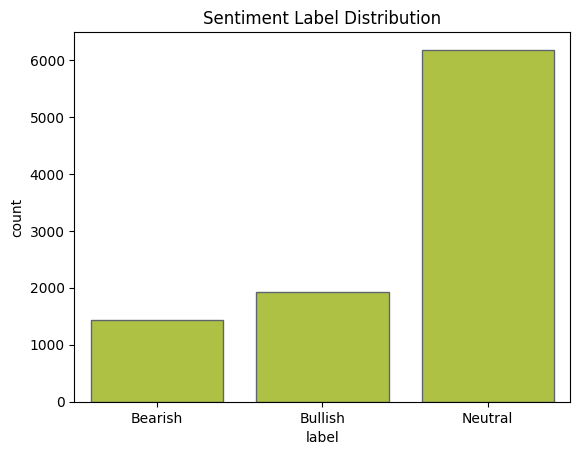

label
2    64.738552
1    20.150896
0    15.110552
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='label', color=color_390, edgecolor=color_431)
plt.title("Sentiment Label Distribution")
plt.xticks([0, 1, 2], ['Bearish', 'Bullish', 'Neutral'])
plt.show()

print(df['label'].value_counts(normalize=True) * 100)

Conclusions:
- We can see that our labels are unbalanced, more than 60% is classified as "Neutral", 20% as "Bullish" and 15% as "Bearish".

## 4.2. Text Length

`Step 8` Check Text Length of the tweets per label.

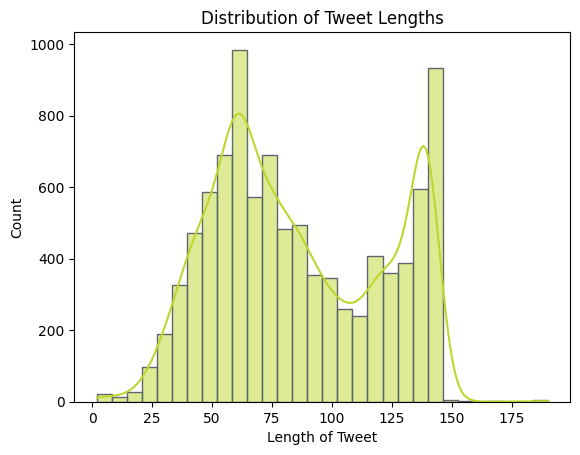

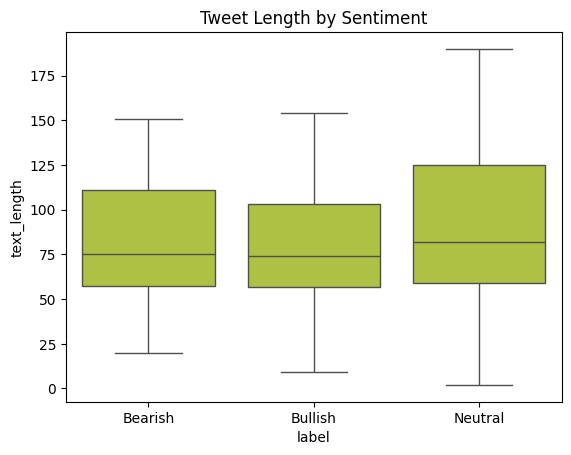

In [5]:
df['text_length'] = df['text'].apply(len)

sns.histplot(df['text_length'], bins=30, kde=True, color=color_390, edgecolor=color_431)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet")
plt.show()

# Grouped by label
sns.boxplot(data=df, x='label', y='text_length', color=color_390)
plt.xticks([0, 1, 2], ['Bearish', 'Bullish', 'Neutral'])
plt.title("Tweet Length by Sentiment")
plt.show()

- The different labels have a simillar distribution in terms of tweet length. <br>
- The tweets length are distributed in a normal distribution with two peaks at length between 60-65 and 140-145. <br>
- There are a lot of tweets (approximately 1000) with length between 60-65, and around 900 with length between 140-145. This represents approximately 19% of the data.

## 4.3. Data Manipulation for Further Exploration

- We want to check the most frequent words per label and the word clouds for each label. At this point our data is raw and we wouldn't get significant analysis. <br>
- For that reason in this section we will copy our dataset in order to do a small preprocessing (tokenize) and then perform the desired analysis. <br>
- After this data manipulation and the referred two analysis we will continue our work with corpus split and data preprocessing from the original dataset.

`Step 9` Using a copy of our dataset we tokenize the tweets in order to have a more accurate analysis.

In [4]:
df_copy = deepcopy(df)

# Preprocessing: basic cleaning and tokenization
df_copy['tokens'] = df_copy['text'].apply(clean_and_tokenize)

df_copy

text  label  \
0     $BYND - JPMorgan reels in expectations on Beyo...      0   
1     $CCL $RCL - Nomura points to bookings weakness...      0   
2     $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0   
3     $ESS: BTIG Research cuts to Neutral https://t....      0   
4     $FNKO - Funko slides after Piper Jaffray PT cu...      0   
...                                                 ...    ...   
9538  The Week's Gainers and Losers on the Stoxx Eur...      2   
9539  Tupperware Brands among consumer gainers; Unil...      2   
9540  vTv Therapeutics leads healthcare gainers; Myo...      2   
9541    WORK, XPO, PYX and AMKR among after hour movers      2   
9542             YNDX, I, QD and OESX among tech movers      2   

                                                 tokens  
0     [bynd, jpmorgan, reels, expectations, beyond, ...  
1     [ccl, rcl, nomura, points, bookings, weakness,...  
2     [cx, cemex, cut, credit, suisse, jp, morgan, w...  
3                  [ess, btig, research, cuts, neutral]  
4        [fnko, funko, slides, piper, jaffray, pt, cut]  
...                                                 ...  
9538  [weeks, gainers, losers, stoxx, europe, dec, e...  
9539  [tupperware, brands, among, consumer, gainers,...  
9540  [vtv, therapeutics, leads, healthcare, gainers...  
9541        [work, xpo, pyx, amkr, among, hour, movers]  
9542              [yndx, qd, oesx, among, tech, movers]  

[9543 rows x 3 columns]

## 4.4. Most Frequent Words per Label

`Step 10` Check top 10 most frequent words per label.


Top 10 words for Bearish tweets:
stock: 148
us: 99
misses: 85
coronavirus: 79
oil: 78
economy: 68
market: 66
stocks: 64
price: 64
china: 63


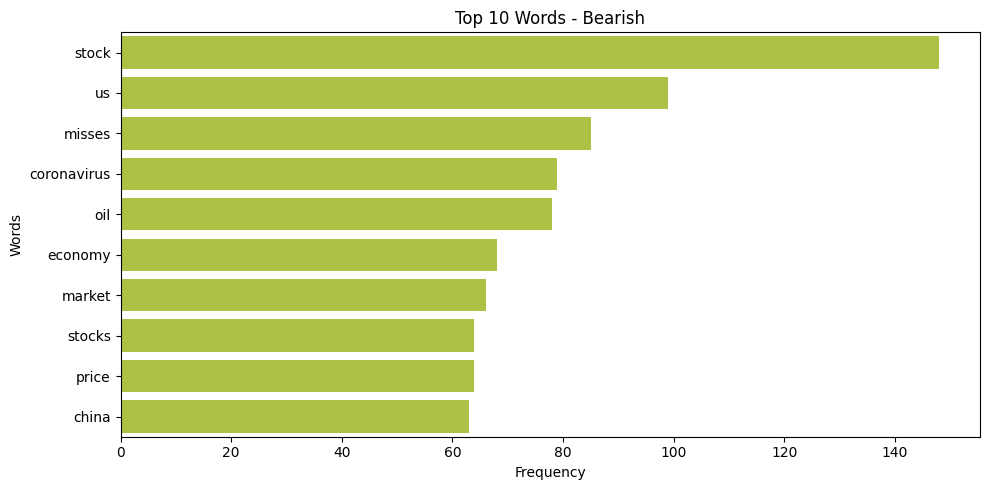


Top 10 words for Bullish tweets:
stock: 255
beats: 164
price: 137
us: 120
target: 117
stocks: 114
shares: 112
revenue: 106
market: 101
new: 97


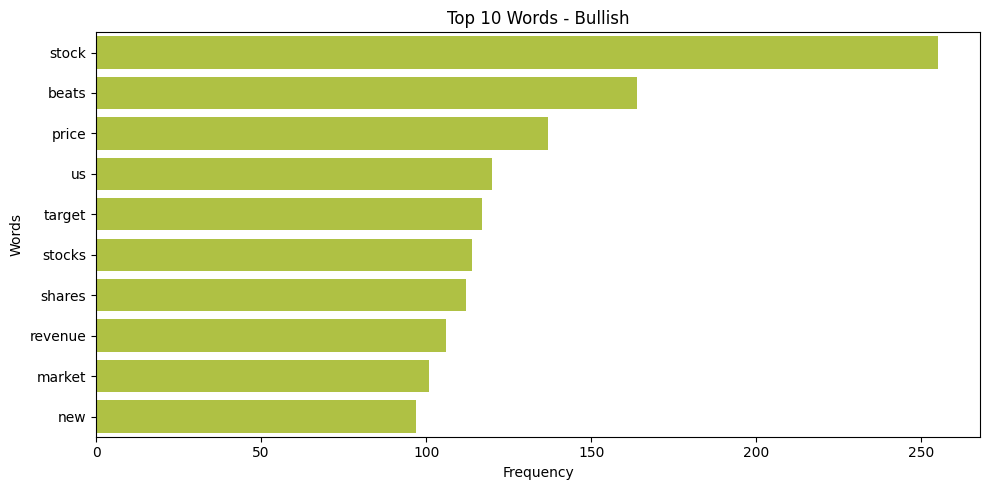


Top 10 words for Neutral tweets:
stock: 570
marketscreener: 376
results: 315
new: 285
earnings: 256
us: 233
says: 233
dividend: 225
reports: 222
inc: 195


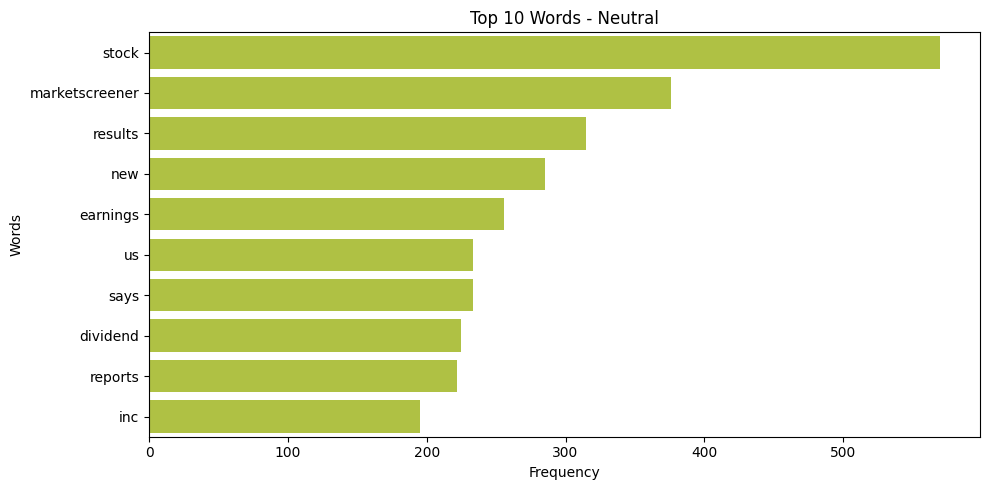

In [6]:
# Map labels to names
label_names = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}

# Loop through each label and show the top 10 words
for label in sorted(df_copy['label'].unique()):
    get_top_words(df_copy, label, top_n=10)

In [ ]:
df_copy.text_length.describe()

count    9543.000000
mean       85.858325
std        35.138568
min         2.000000
25%        58.000000
50%        79.000000
75%       120.000000
max       190.000000
Name: text_length, dtype: float64

- All three labels have the same most common word as "stock" but also a good amount of the plural "stocks". <br>
- "us" also have a good representation in all the 3 labels. <br>
- Even though there is a significance difference between labels there are still some common words between them. <br>
- Neutral tweets don't have such a big gap between the top 5 most common words, which makes the words distribution more balanced. <br>
- The largest tweet have 190 words while the smallest one have 2. <br>
- In average the tweets have around 79 words.

## 4.5. Word Cloud by Label

`Step 11` Check Word Cloud of the different labels.

Word cloud for Bearish label:


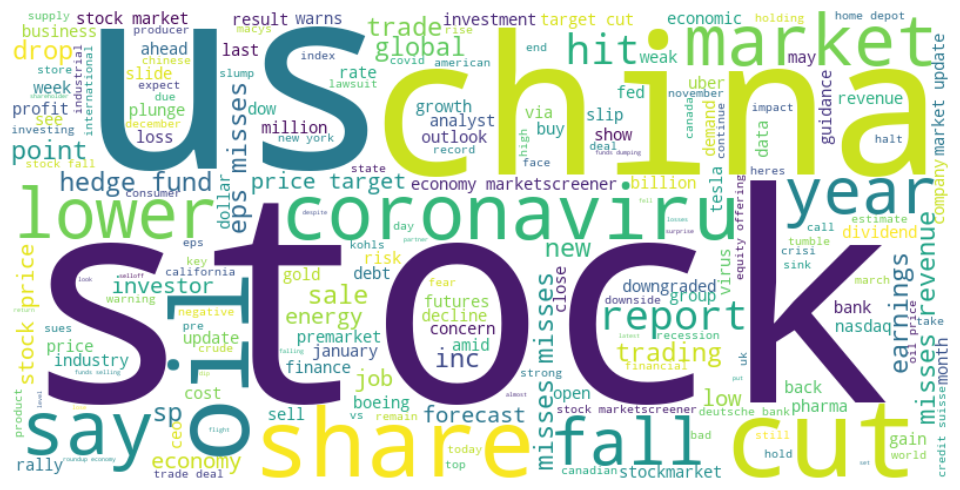

Word cloud for Bullish label:


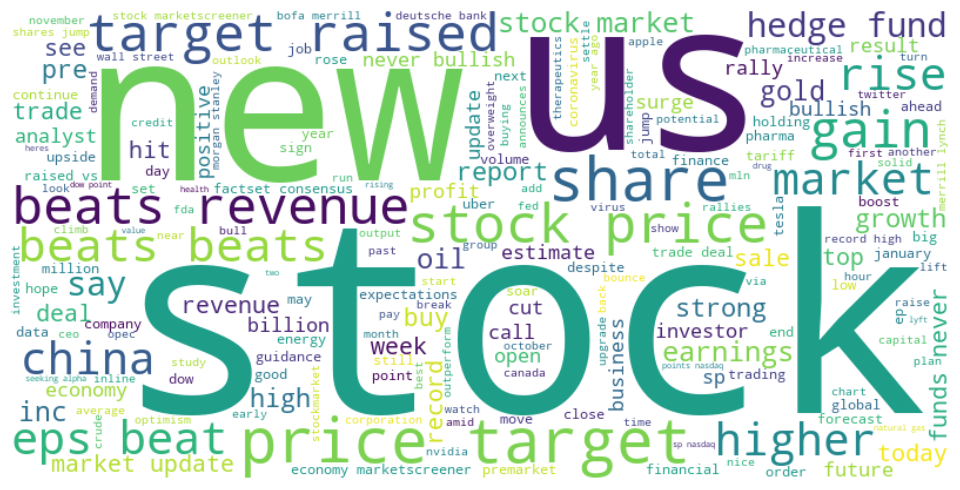

Word cloud for Neutral label:


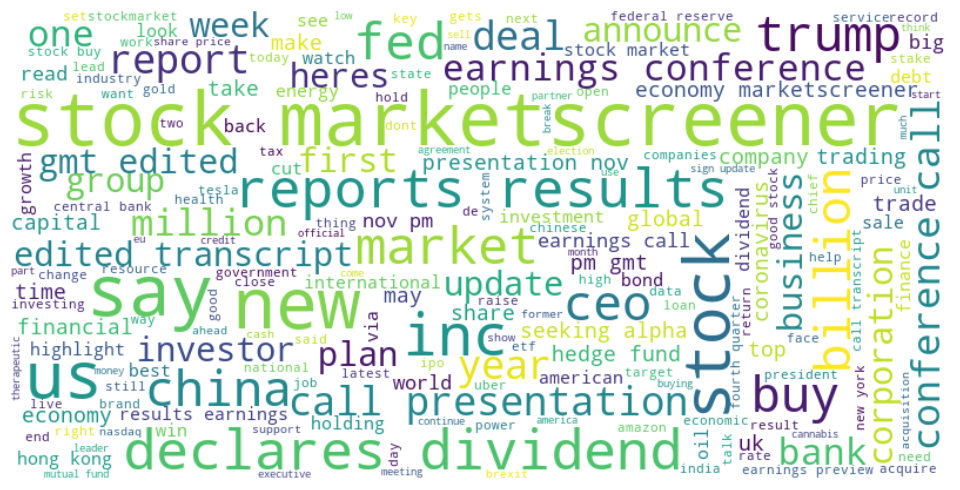

In [ ]:
# Generate word clouds for each label
for label in sorted(df_copy['label'].unique()):
    plot_wordcloud(df_copy, label, label_names)

- As previously observed, “stock” appears as the most prominent word across all sentiment labels. However, in the Neutral label, it stands out less clearly due to a more even distribution among the top words. <br>
- Overall, the Neutral label exhibits a more balanced word frequency distribution compared to the Bearish and Bullish labels. This aligns with expectations: neutral tweets typically lack strong sentiment indicators, resulting in fewer dominant or sentiment-specific keywords that clearly classify the text as bullish or bearish.

# 5. Corpus Split

Since our corpus have less than 10000 rows we will split it in train, validation and test in a 80%/10%/10% split.

`Step 12` Create a copy of the original dataframe named **data**.

In [11]:
data = deepcopy(df)
data

text  label
0     $BYND - JPMorgan reels in expectations on Beyo...      0
1     $CCL $RCL - Nomura points to bookings weakness...      0
2     $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3     $ESS: BTIG Research cuts to Neutral https://t....      0
4     $FNKO - Funko slides after Piper Jaffray PT cu...      0
...                                                 ...    ...
9538  The Week's Gainers and Losers on the Stoxx Eur...      2
9539  Tupperware Brands among consumer gainers; Unil...      2
9540  vTv Therapeutics leads healthcare gainers; Myo...      2
9541    WORK, XPO, PYX and AMKR among after hour movers      2
9542             YNDX, I, QD and OESX among tech movers      2

[9543 rows x 2 columns]

__`Step 13`__ Create a varaible called `X` that store the values of the input features and `y` that stores the values of the target feature.

In [12]:
X = data.drop(columns=['label'], axis =1)
y = data['label']

__`Step 14`__ Split the data in train and validation set in a 80/20 split, with random_state = 42, stratification by y and with shuffle of the dataset.

In [13]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=SEED,
                                                    stratify=y,
                                                    shuffle=True
                                                    )

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    test_size=1/9,
                                                    random_state=SEED,
                                                    stratify=y_train_val,
                                                    shuffle=True
                                                    )

This first split was made for testing the preprocessing methods and the models. Model and feature engeeniring accessment we will use cross validation with the preprocessing inside.

# 6. Data Preprocessing

__`Step 15`__ Create a function to do the data preprocessing. It includes:<br>
|Preprocessement                                  |
|------------------------------------|
| Lowercasing |
| Removes Emojis   |
| Removes Unknown character �   |
| Removes Regular Unwanted Expressions   |
| Remove Punctuation           |
| Tokenization |
| Remove Stop Words                    |
| Lemmatization |
| Stemming                    |

In [15]:
lemma = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

__`Step 16`__ Apply the preprocessement to X_train and X_val.

In [16]:
X_train['tokens'] = preprocess(X_train['text'])
X_train

text  \
447   Brazil's central bank stepped in to prop up th...   
5073  Singapore Frees Listed Local Developers From H...   
5941  $RPAY - Repay Holdings buys Ventanex for up to...   
5479  WHO Pushes Countries to Share More Patient Det...   
4654  How clean hydrogen could make the steel indust...   
...                                                 ...   
6226  JPMorgan anticipates ‘disorderly’ year-end fun...   
9186  $IMMU (+3.2% pre) FDA GRANTS FAST TRACK DESIGN...   
3590  Hero MotoCorp Q3 Results: Profit Beats Estimat...   
1261  Applied DNA Announces Issuance of U.S. Patent ...   
5407  Warren’s Wealth Tax Would Raise Up to $2.7 Tri...   

                                                 tokens  
447          brazils central bank stepped prop currency  
5073  singapore frees listed local developers homesa...  
5941                  rpay repay holdings buys ventanex  
5479  pushes countries share patient details combat ...  
4654  clean hydrogen could make steel industry less ...  
...                                                 ...  
6226  jpmorgan anticipates ‘ disorderly ’ yearend fu...  
9186  immu pre fda grants fast track designation sac...  
3590  hero motocorp q results profit beats estimates...  
1261  applied dna announces issuance us patent prote...  
5407  warren ’ wealth tax would raise trillion years...  

[7633 rows x 2 columns]

In [17]:
X_val['tokens'] = preprocess(X_val['text'])
X_val

text  \
742   What the Fed meeting minutes could say about i...   
1218  Alibaba's books close early in $13.4 billion H...   
497   Bank of Japan : Accounts (March 20) #BankofJap...   
4430  Europe's richest man is spending $1 billion on...   
5829  $EFX - Four Chinese military hackers charged i...   
...                                                 ...   
6615  $AMTD: TD Ameritrade Investor Movement Index: ...   
6387  President Trump reportedly walks away from vap...   
8125                          Why Hecla Mining Is a Buy   
3209  News Highlights : Top Energy News of the Day #...   
3538  Tyson Foods Q1 international/other sales rose ...   

                                                 tokens  
742   fed meeting minutes could say interest rates p...  
1218  alibabas books close early billion hong kong l...  
497                           bank japan accounts march  
4430  europes richest man spending billion departmen...  
5829  efx four chinese military hackers charged equi...  
...                                                 ...  
6615  amtd td ameritrade investor movement index imx...  
6387   president trump reportedly walks away vaping ban  
8125                                   hecla mining buy  
3209                news highlights top energy news day  
3538    tyson foods q internationalother sales rose mln  

[955 rows x 2 columns]

In [18]:
X_train_cleaned=preprocess(X_train['text'])
X_val_cleaned=preprocess(X_val['text'])
X_test_cleaned=preprocess(X_test['text'])

# 7. Feature Engineering

This section contains different feature engineering approachs that our group tested (bag of words, word2vec and transformers).

In [19]:
dim_50 = 50
dim_100=100

## 7.1. Bag of Words (BoW)

__`Step 17`__ Apply BoW to the X_train already preprocessed.

In [20]:
bow = CountVectorizer(binary=True)
X_train_bow = bow.fit_transform(X_train_cleaned)
X_val_bow = bow.transform(X_val_cleaned)

__`Step 18`__ Visualize the 20 most common words in the BoW created.

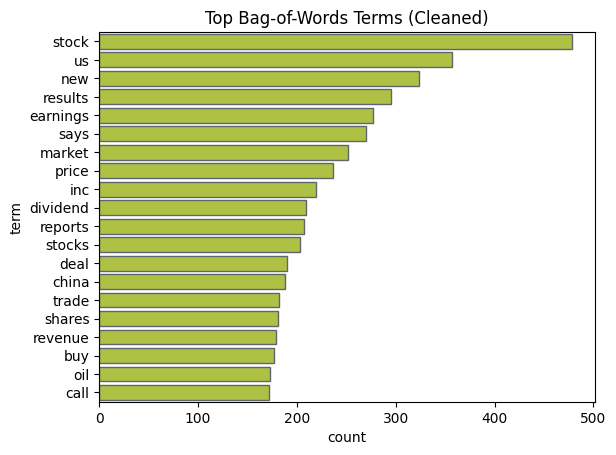

In [114]:
# Visualize top Bag of Words terms (Cleaned)
clean_bow_sum = np.array(X_train_bow.sum(axis=0)).flatten()
clean_terms = bow.get_feature_names_out() # in older versions is get_feature_names()
clean_top = pd.DataFrame({'term': clean_terms, 'count': clean_bow_sum}).sort_values(by='count', ascending=False).head(20)

sns.barplot(data=clean_top, x='count', y='term', color=color_390, edgecolor=color_431)
plt.title("Top Bag-of-Words Terms (Cleaned)")
plt.show()

## 7.2. Word2vec

__`Step 19`__ Apply word2vec to the X_train already preprocessed.

In [21]:
X_train_cleaned_word2vec=preprocess(X_train['text'], word2vec=True)

In [22]:
# Tokenize the tokens column for Word2Vec input
X_train_tokens = [text.split() for text in X_train['tokens']]
X_val_tokens = [text.split() for text in X_val['tokens']]
# Train Word2Vec model on training
w2v_model_50 = Word2Vec(sentences=X_train_cleaned_word2vec, vector_size=dim_50, window=5, min_count=1, workers=4, sg=1)
w2v_model_100 = Word2Vec(sentences=X_train_cleaned_word2vec, vector_size=dim_100, window=5, min_count=1, workers=4, sg=1)

__`Step 20`__ Embeddings for each tweet in the corpus - average of the embeddings of each word in that tweet - suitable for models like KNN and Logistic Regression

In [23]:
# These are embeddings with average (take the average of all the words in the tweet) - suitable for KNN and Logistic Regression
X_train_avgembeddings_from_scratch_50 = np.array([average_embedding(text, w2v_model_50.wv, dim=dim_50) for text in X_train_cleaned])
X_val_avgembeddings_from_scratch_50 = np.array([average_embedding(text, w2v_model_50.wv, dim=dim_50) for text in X_val_cleaned])

In [24]:
# These are embeddings with average (take the average of all the words in the tweet) - suitable for KNN and Logistic Regression
X_train_avgembeddings_from_scratch_100 = np.array([average_embedding(text, w2v_model_100.wv, dim=dim_100) for text in X_train_cleaned])
X_val_avgembeddings_from_scratch_100 = np.array([average_embedding(text, w2v_model_100.wv, dim=dim_100) for text in X_val_cleaned])

__`Step 21`__ Get the embeddings for each word - do not need to make the average - suitable for RNN and LSTM. These models accepts as inputs vectors of vectors

In [25]:
# these are embeddings where each word is a vector (not computed the average across words) - suitable for RNN and LSTM
X_train_embeddings_from_scratch_50 = corpus2vec(X_train_cleaned, w2v_model_50.wv)
X_val_embeddings_from_scratch_50 = corpus2vec(X_val_cleaned, w2v_model_50.wv)

  0%|          | 0/7633 [00:00<?, ?it/s]

100%|██████████| 955/955 [00:00<?, ?it/s]


In [26]:
# these are embeddings where each word is a vector (not computed the average across words) - suitable for RNN and LSTM
X_train_embeddings_from_scratch_100 = corpus2vec(X_train_cleaned, w2v_model_100.wv)
X_val_embeddings_from_scratch_100 = corpus2vec(X_val_cleaned, w2v_model_100.wv)

100%|██████████| 955/955 [00:00<00:00, 176643.16it/s]


## 7.3. Word Vectors with Glove (Pretrained Word Vectors)

__`Step 22`__ Download the pretrained word vectors.

In [27]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [28]:
# We will use the one regarding twitter
glove_model_50 = gensim.downloader.load(f'glove-twitter-{dim_50}')
glove_model_100 = gensim.downloader.load(f'glove-twitter-{dim_100}')

In [29]:
X_train_avgembeddings_glove_50 = np.array([average_embedding(text, glove_model_50, dim=dim_50) for text in X_train_cleaned])
X_val_avgembeddings_glove_50 = np.array([average_embedding(text, glove_model_50, dim=dim_50) for text in X_val_cleaned])

In [126]:
X_train_avgembeddings_glove_100 = np.array([average_embedding(text, glove_model_100, dim=dim_100) for text in X_train_cleaned])
X_val_avgembeddings_glove_100 = np.array([average_embedding(text, glove_model_100, dim=dim_100) for text in X_val_cleaned])

In [30]:
X_train_embeddings_glove_50 = corpus2vec(X_train_cleaned, glove_model_50)
X_val_embeddings_glove_50 = corpus2vec(X_val_cleaned, glove_model_50)

100%|██████████| 955/955 [00:00<00:00, 28746.46it/s]


In [127]:
X_train_embeddings_glove_100 = corpus2vec(X_train_cleaned, glove_model_100)
X_val_embeddings_glove_100 = corpus2vec(X_val_cleaned, glove_model_100)

100%|██████████| 955/955 [00:00<00:00, 27710.74it/s]


## 7.4. Transformers (Encoders for Feature Engineering)

__`Step 23`__ Generate embedings using the transformers

Transformers Tested:

-------------- From Class -----------------
- DistilBERT base uncased
- Roberta Base
- XLM Roberta Base

-------------- Out of Class ---------------
- FinBERT
- DislilBERT Base Cased

In [ ]:
MODEL1 = "assemblyai/distilbert-base-uncased-sst2"
MODEL2 = "cardiffnlp/twitter-roberta-base-sentiment"
MODEL3 = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
MODEL4 = "ProsusAI/finbert"
MODEL5 = "distilbert-base-cased"

In [ ]:
model1 = pipeline("feature-extraction", model=MODEL1, tokenizer=MODEL1, batch_size=16, truncation=True)
# model2 = pipeline("feature-extraction", model=MODEL2, tokenizer=MODEL2, batch_size=16, truncation=True)
# model3 = pipeline("feature-extraction", model=MODEL3, tokenizer=MODEL3, batch_size=16, truncation=True)
# model4 = pipeline("feature-extraction", model=MODEL4, tokenizer=MODEL4, batch_size=16, truncation=True)
# model5 = pipeline("feature-extraction", model=MODEL5, tokenizer=MODEL5, batch_size=16, truncation=True)

Device set to use cpu


In [ ]:
X_train_avgembeddings_transformer1=generate_embeddings(X_train_cleaned, model1)
X_val_avgembeddings_transformer1=generate_embeddings(X_val_cleaned, model1)
# X_train_avgembeddings_transformer2=generate_embeddings(X_train_cleaned, model2)
# X_val_avgembeddings_transformer2=generate_embeddings(X_val_cleaned, model2)
# X_train_avgembeddings_transformer3=generate_embeddings(X_train_cleaned, model3)
# X_val_avgembeddings_transformer3=generate_embeddings(X_val_cleaned, model3)
# X_train_avgembeddings_transformer4=generate_embeddings(X_train_cleaned, model4)
# X_val_avgembeddings_transformer4=generate_embeddings(X_val_cleaned, model4)
# X_train_avgembeddings_transformer5=generate_embeddings(X_train_cleaned, model5)
# X_val_avgembeddings_transformer5=generate_embeddings(X_val_cleaned, model5)

Generating Embeddings: 100%|██████████| 1909/1909 [00:48<00:00, 39.36it/s]


In [ ]:
X_train_embeddings_transformer1=generate_embeddings(X_train_cleaned, model1, for_sequence_model=True)
X_val_embeddings_transformer1=generate_embeddings(X_val_cleaned, model1, for_sequence_model=True)
# X_train_embeddings_transformer2=generate_embeddings(X_train_cleaned, model2, for_sequence_model=True)
# X_val_embeddings_transformer2=generate_embeddings(X_val_cleaned, model2, for_sequence_model=True)
# X_train_embeddings_transformer3=generate_embeddings(X_train_cleaned, model3, for_sequence_model=True)
# X_val_embeddings_transformer3=generate_embeddings(X_val_cleaned, model3, for_sequence_model=True)
# X_train_embeddings_transformer4=generate_embeddings(X_train_cleaned, model4, for_sequence_model=True)
# X_val_embeddings_transformer4=generate_embeddings(X_val_cleaned, model4, for_sequence_model=True)
# X_train_embeddings_transformer5=generate_embeddings(X_train_cleaned, model5, for_sequence_model=True)
# X_val_embeddings_transformer5=generate_embeddings(X_val_cleaned, model5, for_sequence_model=True)

Generating Embeddings: 100%|██████████| 1909/1909 [00:27<00:00, 68.88it/s]


__`Step 24`__ Load the transformers in all the dataset to then use in crossvalidation

In [ ]:
# 1) Clean the texts
texts_cleaned = preprocess(X['text'])

xlm_tok = AutoTokenizer.from_pretrained(
    "cardiffnlp/twitter-xlm-roberta-base-sentiment",
    use_fast=False
)

robert_base_tok=AutoTokenizer.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment",
    use_fast=False
)

finbert_tok=AutoTokenizer.from_pretrained(
    "ProsusAI/finbert",
    use_fast=False
)

distilbert_cased_tok=AutoTokenizer.from_pretrained(
    "distilbert-base-cased",
    use_fast=False
)

# 2) Initialize pipelines once
transformers_pipes = {
    'RobertaBase': pipeline(
        "feature-extraction",
        model="cardiffnlp/twitter-roberta-base-sentiment",
        tokenizer=robert_base_tok,
        use_fast=False,
        batch_size=16, truncation=True
    ),
    'XLMRoberta': pipeline(
        "feature-extraction",
        model="cardiffnlp/twitter-xlm-roberta-base-sentiment",
        tokenizer=xlm_tok,
        use_fast=False,
        batch_size=16, truncation=True
    ),
    'Finbert': pipeline(
        "feature-extraction",
        model="ProsusAI/finbert",
        tokenizer=finbert_tok,
        use_fast=False,
        batch_size=16, truncation=True
    ),
    'DistilbertCased': pipeline(
        "feature-extraction",
        model="distilbert-base-cased",
        tokenizer=distilbert_cased_tok,
        use_fast=False,
        batch_size=16, truncation=True
    ),
}

# CLS embeddings:
precomputed_cls = precompute_embeddings(texts_cleaned, transformers_pipes, sequence=False)

# Sequence embeddings (for RNNs):
precomputed_seq = precompute_embeddings(texts_cleaned, transformers_pipes, sequence=True)


Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Some weights of XLMRobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Device set to use cpu
Device set to use cpu


loading RobertaBase


Generating Embeddings: 100%|██████████| 9543/9543 [03:54<00:00, 40.68it/s]


loading XLMRoberta


Generating Embeddings: 100%|██████████| 9543/9543 [03:52<00:00, 41.01it/s]


loading Finbert


Generating Embeddings: 100%|██████████| 9543/9543 [03:43<00:00, 42.73it/s]


loading DistilbertCased


Generating Embeddings: 100%|██████████| 9543/9543 [02:08<00:00, 74.06it/s]


loading RobertaBase


Generating Embeddings: 100%|██████████| 9543/9543 [03:54<00:00, 40.78it/s]


loading XLMRoberta


Generating Embeddings: 100%|██████████| 9543/9543 [04:00<00:00, 39.73it/s]


loading Finbert


Generating Embeddings: 100%|██████████| 9543/9543 [03:48<00:00, 41.70it/s]


loading DistilbertCased


Generating Embeddings: 100%|██████████| 9543/9543 [02:07<00:00, 74.98it/s]


In [25]:
precomputed_cls

{'RobertaBase': array([[-0.42970073, -1.1109345 , -0.02756199, ..., -1.0715039 ,
         -0.20665328, -0.5011792 ],
        [-0.2655887 , -0.46534184, -0.14403622, ..., -2.0034702 ,
         -0.17918397,  0.04349802],
        [-0.56827056, -0.5792684 ,  0.08447295, ..., -1.4907732 ,
         -0.22760093, -0.35070103],
        ...,
        [-0.4038158 , -0.3929749 , -0.17512104, ..., -0.5585281 ,
          0.02967115, -0.35061273],
        [-0.1982592 , -0.28932762, -0.0427763 , ..., -1.8701763 ,
         -0.4788909 ,  0.31163454],
        [-0.05667178, -0.4547117 , -0.21518792, ..., -1.6193632 ,
         -0.3267693 ,  0.3852179 ]], dtype=float32),
 'XLMRoberta': array([[ 0.09361389,  0.10806807, -0.07811372, ..., -0.423998  ,
          0.1361395 ,  0.14344513],
        [ 0.27077088,  0.6768176 ,  0.06961114, ..., -1.0150374 ,
          0.08878443, -0.37401155],
        [-0.00617623,  0.80134755, -0.20768201, ..., -0.82278866,
          0.50034875, -0.2689569 ],
        ...,
        [ 

In [26]:
precomputed_seq

{'RobertaBase': [array([[-0.42970073, -1.1109345 , -0.02756199, ..., -1.0715039 ,
          -0.20665328, -0.5011792 ],
         [ 0.4606501 , -1.0275838 , -0.29089043, ..., -1.5834193 ,
          -0.7846453 , -0.05395483],
         [-0.14234526, -0.5803351 ,  0.14066109, ..., -2.8323646 ,
          -0.17918882, -0.28421438],
         ...,
         [-0.6148399 , -1.8760471 , -0.308156  , ..., -2.056573  ,
          -0.25655684, -0.34869406],
         [-0.68239564, -1.553741  , -0.18197966, ..., -1.3202776 ,
          -0.24702369, -0.11808112],
         [-0.432531  , -1.0988055 , -0.02257469, ..., -1.0500473 ,
          -0.20895174, -0.4992124 ]], dtype=float32),
  array([[-0.2655887 , -0.46534184, -0.14403622, ..., -2.0034702 ,
          -0.17918397,  0.04349802],
         [ 0.58719516, -0.53979045, -0.27898845, ..., -2.5759714 ,
          -0.6944563 ,  0.23509358],
         [ 0.1460115 , -0.57113105, -0.13126472, ..., -1.7016826 ,
          -0.40357932,  0.05408001],
         ...,
    

# 8. Classification Models

* X_train_avgembeddings_(...) - for KNN and logistic regression models. 
    * Each tweet is a vector with the average embeddings of each word
* X_train_embeddings_(...) - for RNN and LTSM. 
    * Each tweet is a vector of vector. Each word is an embedding, all embeddings have the same size. 
    * It needs padding, which is done below in the RNN and LSTM section.

## 8.1. KNN Classifier, Logistic Regression

__`Step 25`__ Defining configurations for KNN and Logistic Regression

In [128]:
feature_sets = {
    "BoW": (X_train_bow, X_val_bow),
    "Word2Vec": (X_train_avgembeddings_from_scratch_100, X_val_avgembeddings_from_scratch_100),
    "GloVe": (X_train_avgembeddings_glove_100, X_val_avgembeddings_glove_100),
}

In [129]:
knn_configs = [
    {"n_neighbors": 10, "metric": "cosine", "weights": "uniform"},
    {"n_neighbors": 5, "metric": "cosine", "weights": "distance"},
    {"n_neighbors": 10, "metric": "cosine", "weights": "distance"},
    {"n_neighbors": 5, "metric": "cosine", "weights": "uniform"}
]

In [130]:
logreg_configs = [
    {"max_iter": 1000, "solver": "lbfgs"},
    {"max_iter": 1000, "solver": "saga"},
    {"max_iter": 1000, "solver": "liblinear"}
]

### 8.1.1 KNN

__`Step 26`__ Hyperparameter tuning for KNN

In [132]:
results_final = []

for rep_name, (X_train, X_val) in feature_sets.items():
    for config in knn_configs:
        # Initialize model with current hyperparameters
        knn = KNeighborsClassifier(**config)
        # Train and predict
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        # Evaluate
        results = evaluate_and_print(knn, X_train, y_train, X_val, y_val, "KNN", rep_name, config)

        config_str = ', '.join(f"{k}={v}" for k, v in sorted(config.items()))

        results_final.append({
            "prepro + model": rep_name+ " " +config_str,
            "train_f1": results["train_f1"],
            "val_f1": results["val_f1"]
        })


 Model: KNN, Embedding: BoW, Config: {'n_neighbors': 10, 'metric': 'cosine', 'weights': 'uniform'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.7081

VALIDATION METRICS

Macro Avg F1-score: 0.6124

 Model: KNN, Embedding: BoW, Config: {'n_neighbors': 5, 'metric': 'cosine', 'weights': 'distance'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.9969

VALIDATION METRICS

Macro Avg F1-score: 0.6387

 Model: KNN, Embedding: BoW, Config: {'n_neighbors': 10, 'metric': 'cosine', 'weights': 'distance'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.9969

VALIDATION METRICS

Macro Avg F1-score: 0.6316

 Model: KNN, Embedding: BoW, Config: {'n_neighbors': 5, 'metric': 'cosine', 'weights': 'uniform'}
---------------------------------------------------------

__`Step 27`__ Visualizing results

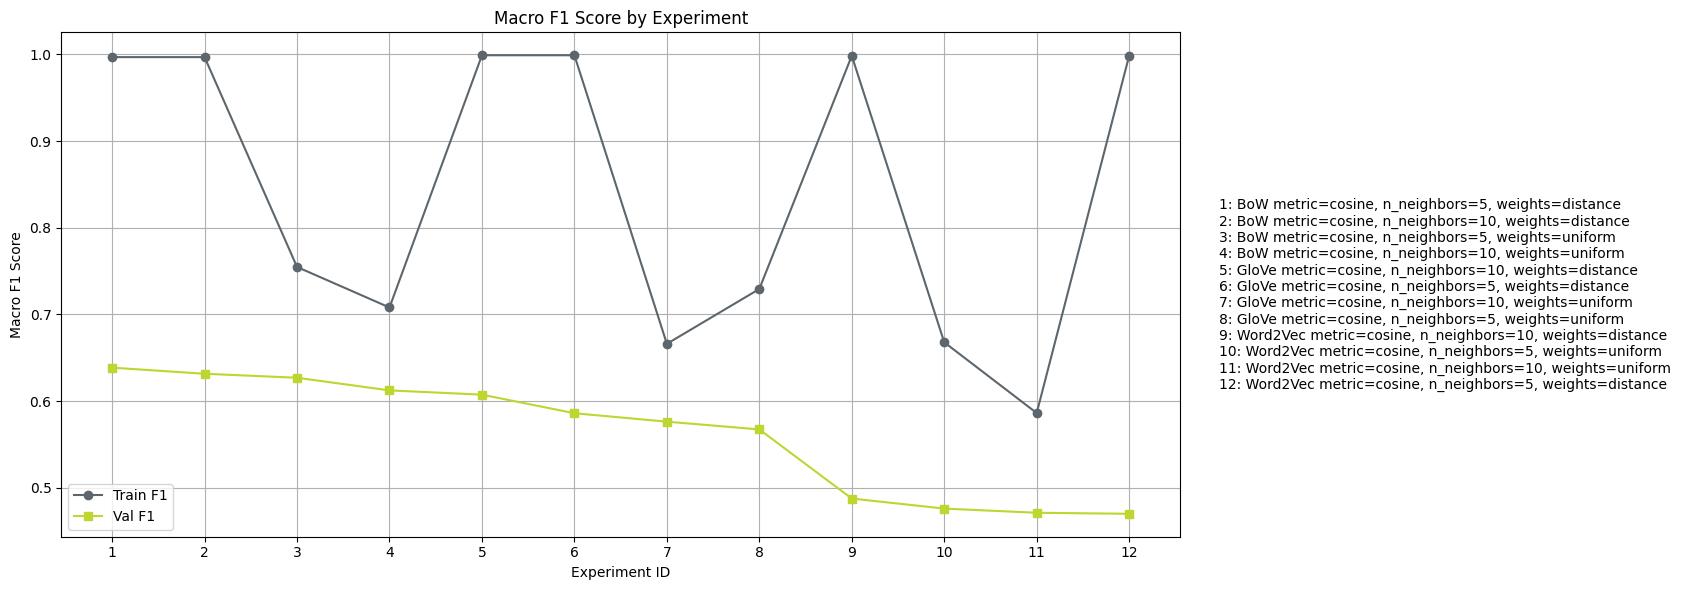

In [134]:
# Convert results_final to a DataFrame
df_results = pd.DataFrame(results_final)

# Sort by validation F1 if desired
df_results = df_results.sort_values("val_f1", ascending=False).reset_index(drop=True)

# Create numerical labels for x-axis
df_results["experiment_id"] = range(1, len(df_results) + 1)

# Create mapping for side legend
legend_labels = [
    f"{i+1}: {name}" for i, name in enumerate(df_results["prepro + model"])
]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    df_results["experiment_id"],
    df_results["train_f1"],
    marker='o',
    label="Train F1",
    color=color_431      # use your color variable for train
)
plt.plot(
    df_results["experiment_id"],
    df_results["val_f1"],
    marker='s',
    label="Val F1",
    color=color_390      # use your color variable for val
)

# Labels and formatting
plt.xticks(df_results["experiment_id"])
plt.xlabel("Experiment ID")
plt.ylabel("Macro F1 Score")
plt.title("Macro F1 Score by Experiment")
plt.grid(True)
plt.legend()

# Side legend text box
legend_text = "\n".join(legend_labels)
plt.gcf().text(
    1.02, 0.5, legend_text,
    fontsize=10, va='center'
)

plt.tight_layout()
plt.show()


### 8.1.2 Logistic Regression

__`Step 28`__ Hyperparameter tuning for Logistic Regression

In [ ]:
results_logreg = []

for rep_name, (X_train, X_val) in feature_sets.items():
    for config in logreg_configs:
        clf = LogisticRegression(**config)
        clf.fit(X_train, y_train)
        results = evaluate_and_print(clf, X_train, y_train, X_val, y_val, "Logistic Regression", rep_name, config)
        config_str = ', '.join(f"{k}={v}" for k, v in sorted(config.items()))

        results_logreg.append({
            "prepro + model": rep_name+ " " +config_str,
            "train_f1": results["train_f1"],
            "val_f1": results["val_f1"]
        })


 Model: Logistic Regression, Embedding: BoW, Config: {'max_iter': 1000, 'solver': 'lbfgs'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.9671

VALIDATION METRICS

Macro Avg F1-score: 0.6722

 Model: Logistic Regression, Embedding: BoW, Config: {'max_iter': 1000, 'solver': 'saga'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.9670

VALIDATION METRICS

Macro Avg F1-score: 0.6722

 Model: Logistic Regression, Embedding: BoW, Config: {'max_iter': 1000, 'solver': 'liblinear'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.9338

VALIDATION METRICS

Macro Avg F1-score: 0.6598

 Model: Logistic Regression, Embedding: Word2Vec, Config: {'max_iter': 1000, 'solver': 'lbfgs'}
---------------------------------------------------------------------------------

c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


 Model: Logistic Regression, Embedding: Word2Vec, Config: {'max_iter': 1000, 'solver': 'saga'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.3621

VALIDATION METRICS

Macro Avg F1-score: 0.3391


c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


 Model: Logistic Regression, Embedding: Word2Vec, Config: {'max_iter': 1000, 'solver': 'liblinear'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.3580

VALIDATION METRICS

Macro Avg F1-score: 0.3340

 Model: Logistic Regression, Embedding: GloVe, Config: {'max_iter': 1000, 'solver': 'lbfgs'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.5722

VALIDATION METRICS

Macro Avg F1-score: 0.5560


c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carol\Documents\mestrado\tx_mng\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


 Model: Logistic Regression, Embedding: GloVe, Config: {'max_iter': 1000, 'solver': 'saga'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.5720

VALIDATION METRICS

Macro Avg F1-score: 0.5553

 Model: Logistic Regression, Embedding: GloVe, Config: {'max_iter': 1000, 'solver': 'liblinear'}
--------------------------------------------------------------------------------------

TRAINING METRICS

Macro Avg F1-score: 0.5547

VALIDATION METRICS

Macro Avg F1-score: 0.5498


__`Step 29`__ Visualizing results

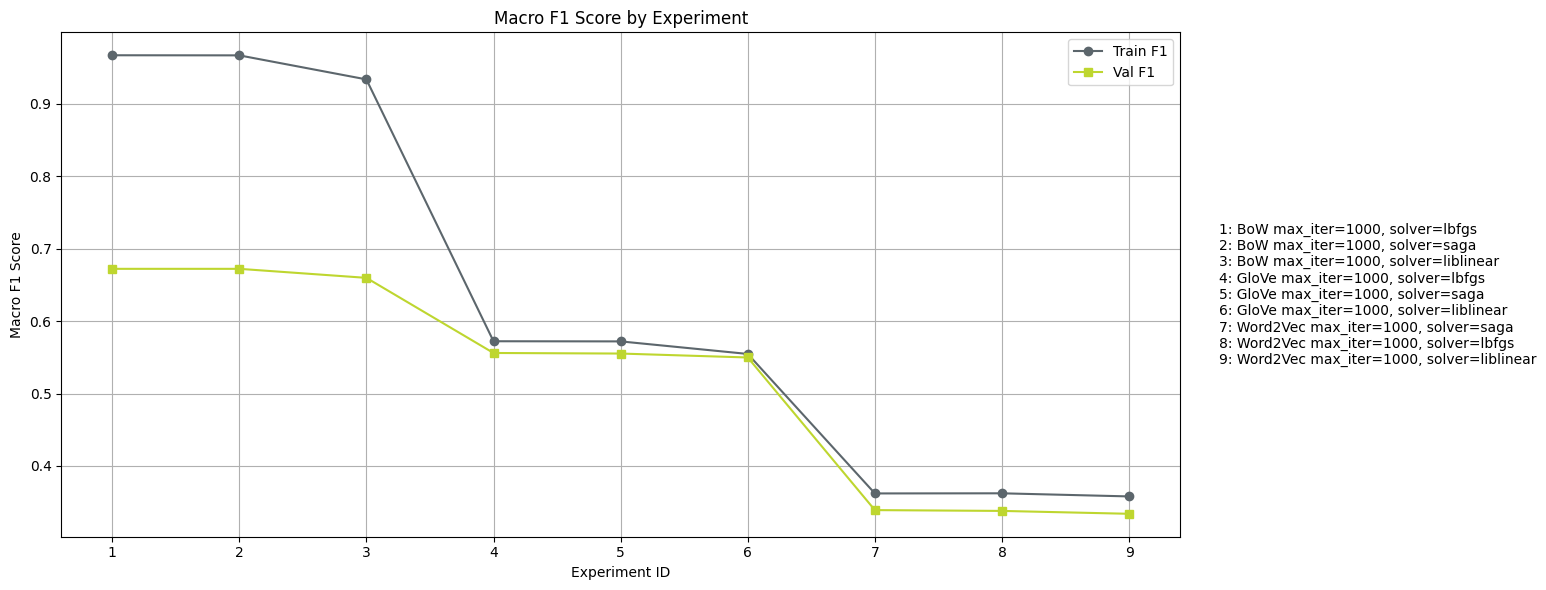

In [137]:
# Convert results_final to a DataFrame
df_results = pd.DataFrame(results_logreg)

# Sort by validation F1 if desired
df_results = df_results.sort_values("val_f1", ascending=False).reset_index(drop=True)

# Create numerical labels for x-axis
df_results["experiment_id"] = range(1, len(df_results) + 1)

# Create mapping for legend
legend_labels = [
    f"{i+1}: {name}" for i, name in enumerate(df_results["prepro + model"])
]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_results["experiment_id"], df_results["train_f1"], marker='o', label="Train F1", color=color_431)
plt.plot(df_results["experiment_id"], df_results["val_f1"], marker='s', label="Val F1", color=color_390)

# Labels and formatting
plt.xticks(df_results["experiment_id"])  # just numbers on x-axis
plt.xlabel("Experiment ID")
plt.ylabel("Macro F1 Score")
plt.title("Macro F1 Score by Experiment")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Add a custom legend as text box
legend_text = "\n".join(legend_labels)
plt.gcf().text(1.02, 0.5, legend_text, fontsize=10, va='center')  # side legend

# Show plot
plt.show()

### 8.1.3 Feature Enginering CrossValidation

__`Step 30`__ Checking the best feature engineering method for the models

In [27]:
feateng_list_knn=['BOW', 'Word2Vec', 'Glove', 'RobertaBase', 'XLMRoberta', 'Finbert', 'DistilbertCased']

In [28]:
df_cv_knn=feateng_crossval(
    X_train_val, y_train_val,
    feateng_list=feateng_list_knn,
    model_name='KNN',
    precomputed_cls=precomputed_cls,
    precomputed_seq=precomputed_seq,
    cv=9,
    seed=SEED)

In [29]:
df_cv_knn

model          feateng  fold  train_f1   test_f1  train_acc  test_acc
0    KNN              BOW     1  0.753926  0.623748   0.823791  0.730890
1    KNN              BOW     2  0.757539  0.606915   0.826805  0.710995
2    KNN              BOW     3  0.757490  0.608368   0.828137  0.719078
3    KNN              BOW     4  0.762765  0.586826   0.829447  0.709644
4    KNN              BOW     5  0.763823  0.552530   0.831019  0.686583
..   ...              ...   ...       ...       ...        ...       ...
58   KNN  DistilbertCased     5  0.521051  0.338724   0.673959  0.549266
59   KNN  DistilbertCased     6  0.520329  0.321644   0.673304  0.537736
60   KNN  DistilbertCased     7  0.518467  0.326598   0.673566  0.519916
61   KNN  DistilbertCased     8  0.529188  0.322715   0.677102  0.531447
62   KNN  DistilbertCased     9  0.522018  0.328218   0.673173  0.527254

[63 rows x 7 columns]

In [31]:
feateng_list_logreg=['BOW', 'Word2Vec', 'Glove', 'RobertaBase', 'XLMRoberta', 'Finbert', 'DistilbertCased']

In [32]:
df_cv_logreg=feateng_crossval(
    X_train_val, y_train_val,
    feateng_list=feateng_list_logreg,
    model_name='LogReg',
    precomputed_cls=precomputed_cls,
    precomputed_seq=precomputed_seq,
    cv=9,
    seed=SEED)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [33]:
df_cv_logreg

model          feateng  fold  train_f1   test_f1  train_acc  test_acc
0   LogReg              BOW     1  0.956830  0.615010   0.968034  0.749738
1   LogReg              BOW     2  0.959459  0.662081   0.969868  0.776963
2   LogReg              BOW     3  0.958660  0.630435   0.969479  0.757862
3   LogReg              BOW     4  0.960045  0.589021   0.970658  0.736897
4   LogReg              BOW     5  0.957914  0.590843   0.969217  0.738994
..     ...              ...   ...       ...       ...        ...       ...
58  LogReg  DistilbertCased     5  0.291368  0.265473   0.651690  0.646751
59  LogReg  DistilbertCased     6  0.299462  0.265233   0.653917  0.634172
60  LogReg  DistilbertCased     7  0.302684  0.270740   0.655620  0.634172
61  LogReg  DistilbertCased     8  0.293550  0.271847   0.652476  0.634172
62  LogReg  DistilbertCased     9  0.308483  0.262313   0.656537  0.635220

[63 rows x 7 columns]

In [147]:
df_cv_knn_logreg=pd.read_csv('../cv_knn_logreg.csv')

In [148]:
df_knn=df_cv_knn_logreg[df_cv_knn_logreg['model']=='KNN']

In [21]:
df_knn

model          feateng  fold  train_f1   test_f1  train_acc  test_acc
0    KNN              BOW     1  0.753926  0.623748   0.823791  0.730890
1    KNN              BOW     2  0.757539  0.606915   0.826805  0.710995
2    KNN              BOW     3  0.757490  0.608368   0.828137  0.719078
3    KNN              BOW     4  0.762765  0.586826   0.829447  0.709644
4    KNN              BOW     5  0.763823  0.552530   0.831019  0.686583
..   ...              ...   ...       ...       ...        ...       ...
58   KNN  DistilbertCased     5  0.521051  0.338724   0.673959  0.549266
59   KNN  DistilbertCased     6  0.520329  0.321644   0.673304  0.537736
60   KNN  DistilbertCased     7  0.518467  0.326598   0.673566  0.519916
61   KNN  DistilbertCased     8  0.529188  0.322715   0.677102  0.531447
62   KNN  DistilbertCased     9  0.522018  0.328218   0.673173  0.527254

[63 rows x 7 columns]

In [149]:
df_logreg=df_cv_knn_logreg[df_cv_knn_logreg['model']=='LogReg']

In [23]:
df_logreg

model          feateng  fold  train_f1   test_f1  train_acc  test_acc
63   LogReg              BOW     1  0.956830  0.615010   0.968034  0.749738
64   LogReg              BOW     2  0.959459  0.662081   0.969868  0.776963
65   LogReg              BOW     3  0.958660  0.630435   0.969479  0.757862
66   LogReg              BOW     4  0.960045  0.589021   0.970658  0.736897
67   LogReg              BOW     5  0.957914  0.590843   0.969217  0.738994
..      ...              ...   ...       ...       ...        ...       ...
121  LogReg  DistilbertCased     5  0.291368  0.265473   0.651690  0.646751
122  LogReg  DistilbertCased     6  0.299462  0.265233   0.653917  0.634172
123  LogReg  DistilbertCased     7  0.302684  0.270740   0.655620  0.634172
124  LogReg  DistilbertCased     8  0.293550  0.271847   0.652476  0.634172
125  LogReg  DistilbertCased     9  0.308483  0.262313   0.656537  0.635220

[63 rows x 7 columns]

__`Step 31`__ Visualizing results

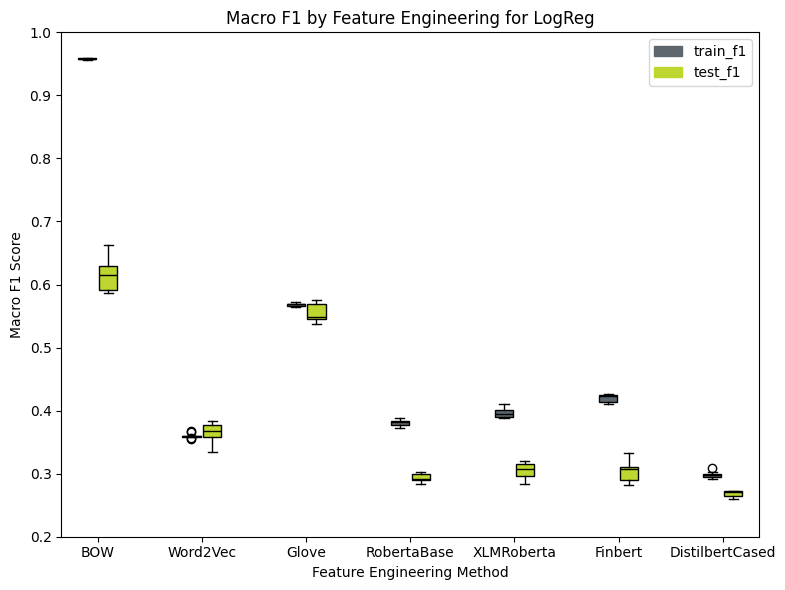

In [153]:
plot_f1_by_feateng(df_logreg,'LogReg')

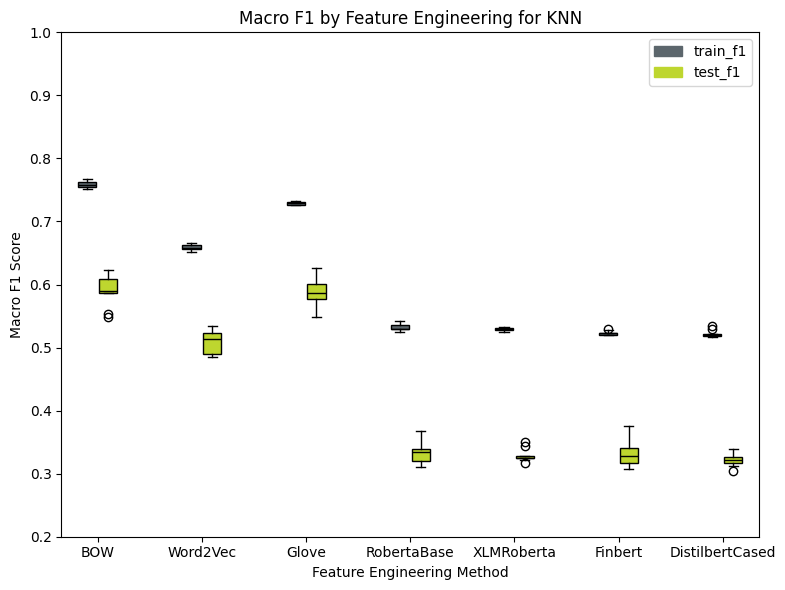

In [154]:
plot_f1_by_feateng(df_knn,'KNN')

__`Step 32`__ Concatenating results to export

In [ ]:
df_cv_knn_logreg=pd.concat([df_cv_knn, df_cv_logreg], ignore_index=True)

In [47]:
df_cv_knn_logreg

model          feateng  fold  train_f1   test_f1  train_acc  test_acc
0       KNN              BOW     1  0.753926  0.623748   0.823791  0.730890
1       KNN              BOW     2  0.757539  0.606915   0.826805  0.710995
2       KNN              BOW     3  0.757490  0.608368   0.828137  0.719078
3       KNN              BOW     4  0.762765  0.586826   0.829447  0.709644
4       KNN              BOW     5  0.763823  0.552530   0.831019  0.686583
..      ...              ...   ...       ...       ...        ...       ...
121  LogReg  DistilbertCased     5  0.291368  0.265473   0.651690  0.646751
122  LogReg  DistilbertCased     6  0.299462  0.265233   0.653917  0.634172
123  LogReg  DistilbertCased     7  0.302684  0.270740   0.655620  0.634172
124  LogReg  DistilbertCased     8  0.293550  0.271847   0.652476  0.634172
125  LogReg  DistilbertCased     9  0.308483  0.262313   0.656537  0.635220

[126 rows x 7 columns]

## 8.2. RNN & LSTM

__`Step 33`__ Pad Sequences and one hot encoding

Needed for RNN and LSTM so that all the sentences have the same lenght
Embeddings with zero are added to the end of each tweet so that they all have lenght equal to the lenght of the longer tweet

In [ ]:
#get list with lenghts of sentences
train_len = []
for i in X_train_embeddings_glove_100:
    train_len.append(len(i))

In [ ]:
max(train_len)

24

In [ ]:
X_train_pad = pad_sequences(maxlen=max(train_len),sequences=X_train_embeddings_glove_100, padding="post", dtype='float64')

In [ ]:
X_train_pad.shape

(7633, 24, 100)

In [ ]:
len(X_train_pad[0][0])

100

In [ ]:
X_val_pad = pad_sequences(maxlen=max(train_len),sequences=X_val_embeddings_glove_100, padding="post", dtype='float64')

In [ ]:
print(X_train_pad[0][:max(train_len)])

[[ 0.0043546   0.25828001  0.88463998 ... -0.14030001  0.18065
   0.030999  ]
 [ 0.29886001  0.43645     0.38124999 ... -0.18531001 -0.51027
   0.29067001]
 [-0.15644     0.68322998  0.50617999 ... -0.75022    -0.17038
  -0.37597001]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
y_train_encoded = tf.one_hot(y_train, depth=3)

In [ ]:
len(y_train)

7633

In [ ]:
y_val_encoded = tf.one_hot(y_val, depth=3)

In [ ]:
len(y_val)

955

In [ ]:
len(X_val_pad)

955

__`Step 33`__ Model Initialization and training

In [ ]:
input_ = Input(shape=(max(train_len), dim_100))
mask = Masking(mask_value=0)(input_)

# Bi-LSTM now returns just the final output vector [B, 2*units]
lstm_out = Bidirectional(LSTM(units=32, return_sequences=False))(mask)

bn = BatchNormalization()(lstm_out)
drop = Dropout(0.4)(bn)
act  = Dense(3,
             activation='softmax',
             kernel_regularizer=regularizers.l2(1e-4)
            )(drop)

model = Model(input_, act)
model.compile(optimizer=Adam(learning_rate=1e-4), loss="categorical_crossentropy", metrics=[CategoricalAccuracy(name="accuracy"), F1Score(average="macro", name="f1_score")])

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 24, 100)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_9         │ (None, 24, 100)   │          0 │ input_layer_12[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_9 (Masking) │ (None, 24, 100)   │          0 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_9 (Any)         │ (None, 24)        │          0 │ not_equal_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 64)        │     34,048 │ masking_9[0][0],  │
│ (Bidirectional)     │                   │            │ any_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ bidirectional_9[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 3)         │        195 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 34,499 (134.76 KB)

 Trainable params: 34,371 (134.26 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
history=model.fit(
    X_train_pad, y_train_encoded,
    validation_data=(X_val_pad, y_val_encoded),
    batch_size=16,
    epochs=20,
    verbose=1
)

Epoch 1/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3824 - f1_score: 0.3350 - loss: 1.5973 - val_accuracy: 0.5571 - val_f1_score: 0.4642 - val_loss: 1.0015
Epoch 2/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5267 - f1_score: 0.4429 - loss: 1.1867 - val_accuracy: 0.6356 - val_f1_score: 0.5108 - val_loss: 0.8758
Epoch 3/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5871 - f1_score: 0.4804 - loss: 0.9999 - val_accuracy: 0.6597 - val_f1_score: 0.5211 - val_loss: 0.8009
Epoch 4/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6199 - f1_score: 0.4918 - loss: 0.9256 - val_accuracy: 0.6838 - val_f1_score: 0.5465 - val_loss: 0.7594
Epoch 5/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6498 - f1_score: 0.5148 - loss: 0.8759 - val_accuracy: 0.6921 - val_f1_score: 0.5482 - val_loss: 0.7344
Epoch 6/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6642 - f1_score: 0.5220 - loss: 0.8176 - val_accuracy: 0.6984 - val_f1_score: 0.5553

In [ ]:
df_history = pd.DataFrame(history.history)
# Add epoch number (starting from 1)
df_history['epoch'] = range(1, len(df_history) + 1)
df_history = df_history[['epoch'] + [col for col in df_history.columns if col != 'epoch']]
df_history.head()

epoch  accuracy  f1_score      loss  val_accuracy  val_f1_score  val_loss
0      1  0.509760  0.377931  1.464185      0.663874      0.391506  0.852801
1      2  0.576575  0.415649  1.231468      0.676440      0.421741  0.842602
2      3  0.596882  0.429536  1.125113      0.689005      0.462540  0.804256
3      4  0.618892  0.456467  1.049479      0.697382      0.479239  0.776977
4      5  0.629897  0.468914  0.984191      0.697382      0.493433  0.751164

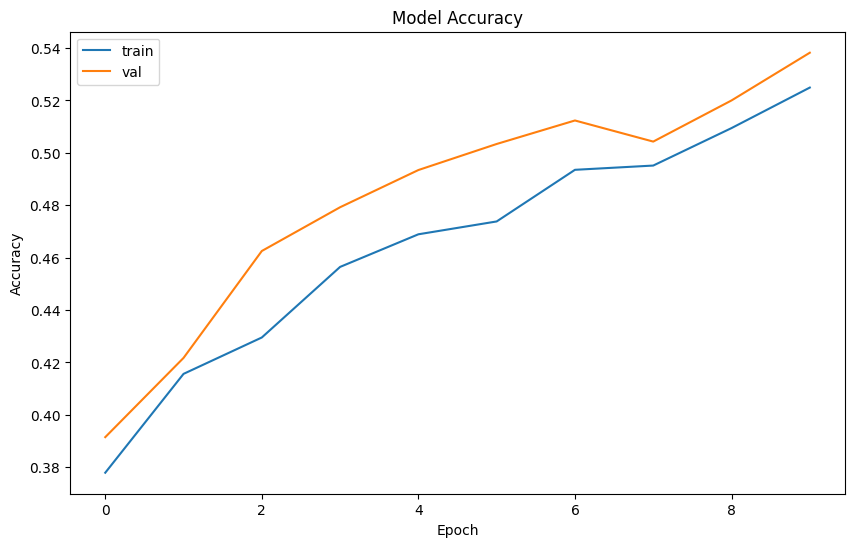

In [ ]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
get_metric(X_val_pad, y_val, model)


Evaluating model: <Functional name=functional_12, built=True>
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Class: bearish
  Precision: 0.6000
  Recall:    0.2292
  F1-score:  0.3317

Class: bullish
  Precision: 0.5854
  Recall:    0.3731
  F1-score:  0.4557

Class: neutral
  Precision: 0.7426
  Recall:    0.9337
  F1-score:  0.8272

Macro Avg F1-score: 0.5382


(0.6427, 0.512, 0.5382)

__`Step 34`__ Feature Engineering CrossValidation

In [27]:
feateng_list_lstm=['Word2Vec', 'Glove', 'RobertaBase']

In [28]:
df_cv_lstm=feateng_crossval(
    X_train_val, y_train_val,
    feateng_list=feateng_list_lstm,
    model_name='LSTM',
    precomputed_cls=precomputed_cls,
    precomputed_seq=precomputed_seq,
    cv=9,
    seed=SEED)

100%|██████████| 955/955 [00:00<00:00, 299458.76it/s]


(7633, 24, 100)
(7633, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7633, 3), dtype=float32)
X_tr: (7633, 24, 100) float32
X_te: (955, 24, 100) float32
y_tr: (7633, 3) <dtype: 'float32'>
y_te_encoded: (955, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6278 - loss: 0.9768 - val_accuracy: 0.6471 - val_loss: 0.8986
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6451 - loss: 0.8983 - val_accuracy: 0.6670 - val_loss: 0.8173
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6577 - loss: 0.8353 - val_accuracy: 0.6681 - val_loss: 0.8053
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6577 - loss: 0.8250 - val_accuracy: 0.6670 - val_loss: 0.8010
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6531 - loss: 0.8244 - val_accuracy: 0.6660 - val_loss: 0.7978
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6569 - los

100%|██████████| 955/955 [00:00<00:00, 190950.10it/s]

(7633, 27, 100)
(7633, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7633, 3), dtype=float32)
X_tr: (7633, 27, 100) float32
X_te: (955, 27, 100) float32
y_tr: (7633, 3) <dtype: 'float32'>
y_te_encoded: (955, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4833 - loss: 1.0192 - val_accuracy: 0.6471 - val_loss: 0.8940
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6453 - loss: 0.8916 - val_accuracy: 0.6764 - val_loss: 0.8362
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6595 - loss: 0.8477 - val_accuracy: 0.6702 - val_loss: 0.8197
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6549 - loss: 0.8332 - val_accuracy: 0.6681 - val_loss: 0.8138
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6535 - loss: 0.8286 - val_accuracy: 0.6670 - val_loss: 0.8099
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6563 - loss: 0.8252 - val_accuracy: 0.6691 - val_loss: 0.8080
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6548 - loss: 0.8198 - val_accuracy: 0.6723 - val_loss: 0.8056
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6569 - loss: 0.8147 - val_accuracy: 0.6723 - val_

100%|██████████| 954/954 [00:00<00:00, 172465.24it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6083 - loss: 0.9913 - val_accuracy: 0.6478 - val_loss: 0.8543
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6491 - loss: 0.8633 - val_accuracy: 0.6761 - val_loss: 0.8057
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6552 - loss: 0.8321 - val_accuracy: 0.6771 - val_loss: 0.8003
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6501 - loss: 0.8264 - val_accuracy: 0.6771 - val_loss: 0.7955
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6549 - loss: 0.8201 - val_accuracy: 0.6751 - val_loss: 0.7923
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6500 - loss: 0.8175 - val_accuracy: 0.6751 - val_loss: 0.7881
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6576 - loss: 0.8126 - val_accuracy: 0.6740 - val_loss: 0.7854
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6557 - loss: 0.8140 - val_accuracy: 0.6761 - val_

100%|██████████| 954/954 [00:00<00:00, 238559.95it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6002 - loss: 0.9821 - val_accuracy: 0.6520 - val_loss: 0.8799
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6648 - loss: 0.8472 - val_accuracy: 0.6551 - val_loss: 0.8301
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6677 - loss: 0.8170 - val_accuracy: 0.6593 - val_loss: 0.8246
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6730 - loss: 0.8097 - val_accuracy: 0.6530 - val_loss: 0.8202
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6663 - loss: 0.8083 - val_accuracy: 0.6530 - val_loss: 0.8171
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6706 - loss: 0.8038 - val_accuracy: 0.6541 - val_loss: 0.8147
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6720 - loss: 0.8019 - val_accuracy: 0.6551 - val_loss: 0.8133
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6756 - loss: 0.7994 - val_accuracy: 0.6572 - val_

100%|██████████| 954/954 [00:00<00:00, 190959.53it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6268 - loss: 0.9761 - val_accuracy: 0.6541 - val_loss: 0.8661
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6525 - loss: 0.8543 - val_accuracy: 0.6562 - val_loss: 0.8174
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6555 - loss: 0.8322 - val_accuracy: 0.6604 - val_loss: 0.8127
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6549 - loss: 0.8288 - val_accuracy: 0.6604 - val_loss: 0.8069
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6549 - loss: 0.8208 - val_accuracy: 0.6614 - val_loss: 0.8060
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6541 - loss: 0.8185 - val_accuracy: 0.6635 - val_loss: 0.8018
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6554 - loss: 0.8175 - val_accuracy: 0.6604 - val_loss: 0.8006
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6568 - loss: 0.8123 - val_accuracy: 0.6635 - val_

100%|██████████| 954/954 [00:00<00:00, 190731.97it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5749 - loss: 0.9942 - val_accuracy: 0.6478 - val_loss: 0.8813
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6518 - loss: 0.8766 - val_accuracy: 0.6677 - val_loss: 0.8216
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6625 - loss: 0.8348 - val_accuracy: 0.6656 - val_loss: 0.8123
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6639 - loss: 0.8275 - val_accuracy: 0.6698 - val_loss: 0.8107
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6624 - loss: 0.8217 - val_accuracy: 0.6656 - val_loss: 0.8016
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6623 - loss: 0.8164 - val_accuracy: 0.6635 - val_loss: 0.7962
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6608 - loss: 0.8133 - val_accuracy: 0.6656 - val_loss: 0.7928
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6619 - loss: 0.8091 - val_accuracy: 0.6667 - val_

100%|██████████| 954/954 [00:00<00:00, 190841.13it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6463 - loss: 0.9706 - val_accuracy: 0.6478 - val_loss: 0.8800
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6582 - loss: 0.8538 - val_accuracy: 0.6499 - val_loss: 0.8516
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6702 - loss: 0.8175 - val_accuracy: 0.6447 - val_loss: 0.8420
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6709 - loss: 0.8104 - val_accuracy: 0.6457 - val_loss: 0.8371
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6696 - loss: 0.8051 - val_accuracy: 0.6447 - val_loss: 0.8309
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6686 - loss: 0.8001 - val_accuracy: 0.6478 - val_loss: 0.8275
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6673 - loss: 0.7998 - val_accuracy: 0.6478 - val_loss: 0.8256
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6713 - loss: 0.7912 - val_accuracy: 0.6488 - val_

100%|██████████| 954/954 [00:00<00:00, 227298.68it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5894 - loss: 0.9970 - val_accuracy: 0.6499 - val_loss: 0.8928
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6472 - loss: 0.8856 - val_accuracy: 0.6562 - val_loss: 0.8393
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6581 - loss: 0.8412 - val_accuracy: 0.6572 - val_loss: 0.8308
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6578 - loss: 0.8307 - val_accuracy: 0.6562 - val_loss: 0.8270
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6602 - loss: 0.8273 - val_accuracy: 0.6562 - val_loss: 0.8246
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6605 - loss: 0.8200 - val_accuracy: 0.6572 - val_loss: 0.8220
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6606 - loss: 0.8176 - val_accuracy: 0.6551 - val_loss: 0.8192
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6612 - loss: 0.8123 - val_accuracy: 0.6541 - val_

100%|██████████| 954/954 [00:00<00:00, 238545.73it/s]

(7634, 27, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 27, 100) float32
X_te: (954, 27, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40


478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6098 - loss: 0.9771 - val_accuracy: 0.6478 - val_loss: 0.8895
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6427 - loss: 0.8880 - val_accuracy: 0.6698 - val_loss: 0.8112
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6511 - loss: 0.8450 - val_accuracy: 0.6625 - val_loss: 0.8046
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6494 - loss: 0.8377 - val_accuracy: 0.6604 - val_loss: 0.8018
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6483 - loss: 0.8337 - val_accuracy: 0.6593 - val_loss: 0.7992
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6514 - loss: 0.8309 - val_accuracy: 0.6572 - val_loss: 0.7972
Epoch 7/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6502 - loss: 0.8233 - val_accuracy: 0.6604 - val_loss: 0.7951
Epoch 8/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6489 - loss: 0.8236 - val_accuracy: 0.6583 - val_

100%|██████████| 955/955 [00:00<00:00, 14775.70it/s]


(7633, 22, 100)
(7633, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7633, 3), dtype=float32)
X_tr: (7633, 22, 100) float32
X_te: (955, 22, 100) float32
y_tr: (7633, 3) <dtype: 'float32'>
y_te_encoded: (955, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5092 - loss: 1.0089 - val_accuracy: 0.6461 - val_loss: 0.8204
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6583 - loss: 0.8143 - val_accuracy: 0.6796 - val_loss: 0.7474
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6825 - loss: 0.7563 - val_accuracy: 0.6932 - val_loss: 0.7282
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6939 - loss: 0.7283 - val_accuracy: 0.7016 - val_loss: 0.7106
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7057 - loss: 0.7090 - val_accuracy: 0.7120 - val_loss: 0.6999
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7148 - los

100%|██████████| 955/955 [00:00<00:00, 26809.72it/s]


(7633, 24, 100)
(7633, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7633, 3), dtype=float32)
X_tr: (7633, 24, 100) float32
X_te: (955, 24, 100) float32
y_tr: (7633, 3) <dtype: 'float32'>
y_te_encoded: (955, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6039 - loss: 0.9464 - val_accuracy: 0.6461 - val_loss: 0.8391
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6538 - loss: 0.8167 - val_accuracy: 0.6775 - val_loss: 0.7509
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6778 - loss: 0.7505 - val_accuracy: 0.6995 - val_loss: 0.7260
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6938 - loss: 0.7192 - val_accuracy: 0.7068 - val_loss: 0.7109
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7048 - loss: 0.7036 - val_accuracy: 0.7120 - val_loss: 0.6975
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7116 - los

100%|██████████| 954/954 [00:00<00:00, 27894.58it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5436 - loss: 0.9980 - val_accuracy: 0.6457 - val_loss: 0.8374
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6484 - loss: 0.8211 - val_accuracy: 0.6751 - val_loss: 0.7619
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6775 - loss: 0.7565 - val_accuracy: 0.6803 - val_loss: 0.7448
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6865 - loss: 0.7346 - val_accuracy: 0.6887 - val_loss: 0.7331
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6902 - loss: 0.7218 - val_accuracy: 0.6960 - val_loss: 0.7231
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7005 - los

100%|██████████| 954/954 [00:00<00:00, 27182.27it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5943 - loss: 0.9582 - val_accuracy: 0.6478 - val_loss: 0.8305
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6669 - loss: 0.7953 - val_accuracy: 0.6771 - val_loss: 0.7628
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6900 - loss: 0.7377 - val_accuracy: 0.6887 - val_loss: 0.7487
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6992 - loss: 0.7142 - val_accuracy: 0.6897 - val_loss: 0.7366
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7079 - loss: 0.6997 - val_accuracy: 0.6971 - val_loss: 0.7286
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7125 - los

100%|██████████| 954/954 [00:00<00:00, 26212.17it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5595 - loss: 0.9767 - val_accuracy: 0.6478 - val_loss: 0.8275
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6526 - loss: 0.8126 - val_accuracy: 0.6803 - val_loss: 0.7623
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6758 - loss: 0.7551 - val_accuracy: 0.6866 - val_loss: 0.7431
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6941 - loss: 0.7263 - val_accuracy: 0.6876 - val_loss: 0.7271
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7061 - loss: 0.7062 - val_accuracy: 0.6950 - val_loss: 0.7132
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7286 - los

100%|██████████| 954/954 [00:00<00:00, 27125.33it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5764 - loss: 0.9786 - val_accuracy: 0.6478 - val_loss: 0.8104
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6543 - loss: 0.8124 - val_accuracy: 0.6897 - val_loss: 0.7361
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6816 - loss: 0.7599 - val_accuracy: 0.7065 - val_loss: 0.7146
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6972 - loss: 0.7403 - val_accuracy: 0.7055 - val_loss: 0.7000
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6988 - loss: 0.7201 - val_accuracy: 0.7128 - val_loss: 0.6853
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7130 - los

100%|██████████| 954/954 [00:00<00:00, 26143.66it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4557 - loss: 1.0428 - val_accuracy: 0.6468 - val_loss: 0.8492
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6621 - loss: 0.8194 - val_accuracy: 0.6751 - val_loss: 0.7801
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6902 - loss: 0.7518 - val_accuracy: 0.6887 - val_loss: 0.7649
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6989 - loss: 0.7249 - val_accuracy: 0.6939 - val_loss: 0.7529
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7061 - loss: 0.7026 - val_accuracy: 0.7044 - val_loss: 0.7422
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7166 - los

100%|██████████| 954/954 [00:00<00:00, 26832.48it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5122 - loss: 1.0093 - val_accuracy: 0.6488 - val_loss: 0.8114
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6544 - loss: 0.8018 - val_accuracy: 0.6897 - val_loss: 0.7316
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6772 - loss: 0.7581 - val_accuracy: 0.6939 - val_loss: 0.7142
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6915 - loss: 0.7387 - val_accuracy: 0.7055 - val_loss: 0.7003
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6937 - loss: 0.7215 - val_accuracy: 0.7170 - val_loss: 0.6889
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7041 - los

100%|██████████| 954/954 [00:00<00:00, 27097.41it/s]


(7634, 24, 100)
(7634, 3)
tf.Tensor(
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]], shape=(7634, 3), dtype=float32)
X_tr: (7634, 24, 100) float32
X_te: (954, 24, 100) float32
y_tr: (7634, 3) <dtype: 'float32'>
y_te_encoded: (954, 3) <dtype: 'float32'>
Epoch 1/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4986 - loss: 0.9998 - val_accuracy: 0.6604 - val_loss: 0.8248
Epoch 2/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6578 - loss: 0.8096 - val_accuracy: 0.6960 - val_loss: 0.7602
Epoch 3/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6773 - loss: 0.7596 - val_accuracy: 0.7065 - val_loss: 0.7363
Epoch 4/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6838 - loss: 0.7328 - val_accuracy: 0.7117 - val_loss: 0.7166
Epoch 5/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6955 - loss: 0.7106 - val_accuracy: 0.7149 - val_loss: 0.6972
Epoch 6/40
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7063 - los

In [29]:
df_cv_lstm

model      feateng  fold  train_f1   test_f1  train_acc  test_acc
0   LSTM     Word2Vec     1  0.397820  0.403965   0.682563  0.689005
1   LSTM     Word2Vec     2  0.393633  0.402818   0.678894  0.680628
2   LSTM     Word2Vec     3  0.400189  0.411245   0.683128  0.688679
3   LSTM     Word2Vec     4  0.395260  0.377390   0.679198  0.667715
4   LSTM     Word2Vec     5  0.402955  0.406782   0.684962  0.679245
5   LSTM     Word2Vec     6  0.400967  0.421189   0.675400  0.690776
6   LSTM     Word2Vec     7  0.426780  0.414394   0.691119  0.681342
7   LSTM     Word2Vec     8  0.404648  0.374487   0.683390  0.660377
8   LSTM     Word2Vec     9  0.408597  0.400565   0.684307  0.681342
9   LSTM        Glove     1  0.811777  0.639891   0.869514  0.751832
10  LSTM        Glove     2  0.835878  0.673209   0.883008  0.743455
11  LSTM        Glove     3  0.815620  0.641049   0.872937  0.734801
12  LSTM        Glove     4  0.822562  0.606752   0.872151  0.691824
13  LSTM        Glove     5  0.835054  0.653100   0.886560  0.741090
14  LSTM        Glove     6  0.805496  0.658982   0.846607  0.730608
15  LSTM        Glove     7  0.829885  0.628888   0.881320  0.719078
16  LSTM        Glove     8  0.797829  0.673846   0.860231  0.767296
17  LSTM        Glove     9  0.828974  0.642216   0.879487  0.752621
18  LSTM  RobertaBase     1  0.654841  0.329608   0.769291  0.518325
19  LSTM  RobertaBase     2  0.650279  0.335619   0.768636  0.578010
20  LSTM  RobertaBase     3  0.635241  0.315182   0.756615  0.550314
21  LSTM  RobertaBase     4  0.608997  0.363954   0.739717  0.588050
22  LSTM  RobertaBase     5  0.632282  0.321519   0.751113  0.536688
23  LSTM  RobertaBase     6  0.672500  0.341332   0.759759  0.496855
24  LSTM  RobertaBase     7  0.525402  0.327996   0.707624  0.585954
25  LSTM  RobertaBase     8  0.665637  0.308591   0.770893  0.525157
26  LSTM  RobertaBase     9  0.607792  0.308310   0.758449  0.574423

In [ ]:
# df_cv_lstm.to_csv('../df_cv_lstm.csv', index=False)^
# df_cv_lstm=pd.read_csv('../df_cv_lstm.csv')

In [157]:
df_cv_lstm=pd.read_csv('../df_cv_lstm.csv')

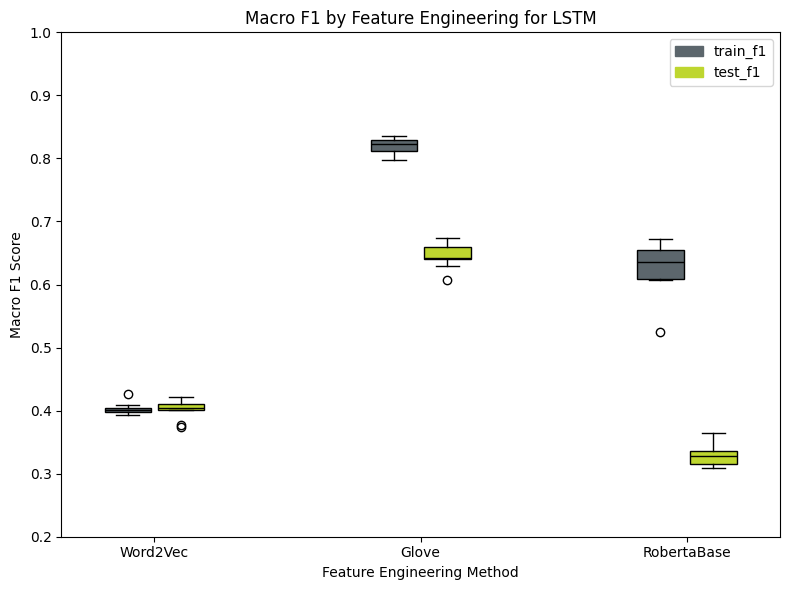

In [159]:
plot_f1_by_feateng(df_cv_lstm,'LSTM')

__`Step 35`__ Export outputs

In [ ]:
df_cv_knn_logreg=pd.read_csv('../cv_knn_logreg.csv')

df_cv_final = pd.concat([df_cv_knn_logreg, df_cv_lstm], ignore_index=True)

df_cv_final.to_csv('../df_cv_final.csv', index=False)

## 8.3. Transformers

__`Step 36`__ Define a helper class 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

### 8.3.1. RoBERTa

__`Step 37`__ Set Up the Model (RoBERTa + Custom Classifier).

In [ ]:
MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"

class RoBERTaSentimentClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_labels=3, dropout=0.3):
        super(RoBERTaSentimentClassifier, self).__init__()
        self.roberta = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.roberta.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits


__`Step 38`__ Tokenize & Dataset Preparation.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_dataset = TextDataset(X_train_cleaned, y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val_cleaned, y_val.tolist(), tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


__`Step 39`__ Training the Classifier.

In [ ]:
model_roberta = RoBERTaSentimentClassifier().to(device)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_tranformer(train_loader, val_loader, model_roberta)

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


__`Step 40`__ Evaluate the Model

In [ ]:
print(get_metrics_transformers(train_loader, model_roberta))


           precision    recall  f1-score
0           0.941980  0.956672  0.949269
1           0.955627  0.966818  0.961190
2           0.987974  0.980777  0.984362
macro avg   0.961860  0.968089  0.964941


In [ ]:
print(get_metrics_transformers(val_loader, model_roberta))

           precision    recall  f1-score
0           0.774436  0.715278  0.743682
1           0.766667  0.715026  0.739946
2           0.886293  0.920712  0.903175
macro avg   0.809132  0.783672  0.795601


### 8.3.2. XLM RoBERTa

__`Step 41`__ Set Up the Model (XLM RoBERTa + Custom Classifier).

In [ ]:
MODEL_NAME = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

class XLMROBERTASentimentClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_labels=3, dropout=0.1):
        super(XLMROBERTASentimentClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits

__`Step 42`__ Tokenize & Dataset Preparation.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_dataset = TextDataset(X_train_cleaned, y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val_cleaned, y_val.tolist(), tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


__`Step 43`__ Training the Classifier.

In [ ]:
model_xlm = XLMROBERTASentimentClassifier().to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_tranformer(train_loader, val_loader, model_xlm)

Some weights of XLMRobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 — Loss: 0.6450
Epoch 2 — Loss: 0.4381
Epoch 3 — Loss: 0.3054


__`Step 44`__ Evaluate the Model

In [ ]:
print(get_metrics_transformers(train_loader, model_xlm))

           precision    recall  f1-score
0           0.868421  0.943674  0.904485
1           0.925879  0.942746  0.934236
2           0.988160  0.962566  0.975195
macro avg   0.927486  0.949662  0.937972
           precision    recall  f1-score
0           0.605714  0.736111  0.664577
1           0.698020  0.730570  0.713924
2           0.904844  0.846278  0.874582
macro avg   0.736193  0.770986  0.751028
           precision    recall  f1-score
0           0.680000  0.826389  0.746082
1           0.744681  0.725389  0.734908
2           0.917230  0.878641  0.897521
macro avg   0.780637  0.810139  0.792837


In [ ]:
print(get_metrics_transformers(val_loader, model_xlm))

### 8.3.3. FinBERT

__`Step 45`__ Set Up the Model (FinBERT + Custom Classifier).

In [ ]:
MODEL_NAME = "ProsusAI/finbert"

class FinBERTSentimentClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_labels=3, dropout=0.1):
        super(FinBERTSentimentClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits

__`Step 46`__ Tokenize & Dataset Preparation.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_dataset = TextDataset(X_train_cleaned, y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val_cleaned, y_val.tolist(), tokenizer)


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

__`Step 47`__ Training the Classifier.

In [ ]:
model_finbert = FinBERTSentimentClassifier().to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_tranformer(train_loader, val_loader, model_finbert)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch 1 — Loss: 0.5782
Epoch 2 — Loss: 0.3602
Epoch 3 — Loss: 0.2022


__`Step 48`__ Evaluate the Model

In [ ]:
print(get_metrics_transformers(train_loader, model_finbert))


           precision    recall  f1-score
0           0.920033  0.967071  0.942966
1           0.966057  0.962915  0.964484
2           0.989566  0.978754  0.984130
macro avg   0.958552  0.969580  0.963860
           precision    recall  f1-score
0           0.611429  0.743056  0.670846
1           0.766871  0.647668  0.702247
2           0.888169  0.886731  0.887449
macro avg   0.755489  0.759152  0.753514
           precision    recall  f1-score
0           0.682635  0.791667  0.733119
1           0.802326  0.715026  0.756164
2           0.891234  0.888350  0.889789
macro avg   0.792065  0.798347  0.793024


In [ ]:
print(get_metrics_transformers(val_loader, model_finbert))


### 8.3.4. DistilBERT Cased

__`Step 49`__ Set Up the Model (DIstilBERT + Custom Classifier).

In [ ]:
MODEL_NAME = "distilbert-base-cased"

class DistilBERTCSentimentClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_labels=3, dropout=0.3):
        super(DistilBERTCSentimentClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits

__`Step 50`__ Tokenize & Dataset Preparation.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_dataset = TextDataset(X_train_cleaned, y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val_cleaned, y_val.tolist(), tokenizer)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

__`Step 51`__ Training the Classifier.

In [ ]:
model_distil = DistilBERTCSentimentClassifier().to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_tranformer(train_loader, val_loader, model_distil)


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Epoch 1 — Loss: 0.6670
Epoch 2 — Loss: 0.3967
Epoch 3 — Loss: 0.2025


__`Step 52`__ Evaluate the Model

In [ ]:
print(get_metrics_transformers(train_loader, model_distil))


           precision    recall  f1-score
0           0.979034  0.930676  0.954243
1           0.925630  0.979831  0.951960
2           0.990833  0.984217  0.987514
macro avg   0.965166  0.964908  0.964572
           precision    recall  f1-score
0           0.734513  0.576389  0.645914
1           0.627706  0.751295  0.683962
2           0.887070  0.877023  0.882018
macro avg   0.749763  0.734902  0.737298
           precision    recall  f1-score
0           0.789916  0.652778  0.714829
1           0.651064  0.792746  0.714953
2           0.900166  0.875405  0.887613
macro avg   0.780382  0.773643  0.772465


In [ ]:
print(get_metrics_transformers(val_loader, model_distil))

### 8.3.5 BART

__`Step 53`__ Set Up the Model (BART).

In [ ]:
MODEL_NAME="facebook/bart-large"

class BARTSentimentClassifier(nn.Module):
    def __init__(self, model_name: str = MODEL_NAME, num_labels: int = 3, dropout: float = 0.3):
        super(BARTSentimentClassifier, self).__init__()
        self.bart = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bart.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bart(input_ids=input_ids, attention_mask=attention_mask, return_dict=True,)
        pooled = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled))
        return logits

__`Step 54`__ Tokenize & Dataset Preparation.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_dataset = TextDataset(X_train_cleaned, y_train.tolist(), tokenizer)
val_dataset = TextDataset(X_val_cleaned, y_val.tolist(), tokenizer)

__`Step 55`__ Training the Classifier.

In [ ]:
model_bart = BARTSentimentClassifier().to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_tranformer(train_loader, val_loader, model_bart)

__`Step 56`__ Evaluate the Model

In [ ]:
print(get_metrics_transformers(train_loader, model_bart))

In [ ]:
print(get_metrics_transformers(val_loader, model_bart))

# 9. Evaluation

We split the test evaluations into 3 and then concatenated the results just because we had to rerun some parts. But it can also be run with all the models at once

__`Step 57`__ Get the final models and use the evaluate_on_test function to evaluate results

In [41]:
final_models_kll = [
   ["KNN", "Glove"],
   ["LogReg", "Glove"]
]

final_models_transformers = ["RoBERTa", "XLM RoBERTa", "FinBERT", "DistilBERT Cased", "BART"]

In [ ]:
final_models_lstm=[
    ['LSTM', 'Glove']
]

In [ ]:
test_results_transformers = evaluate_on_test(X_train_val, y_train_val, X_test, y_test, final_models_transformers)

100%|██████████| 955/955 [00:00<00:00, 23448.33it/s]


Finished evaluating KNN. Macro F1 on train: 0.7609144517869776, on test: 0.5993553903411799


100%|██████████| 955/955 [00:00<00:00, 13502.83it/s]


Finished evaluating LogReg. Macro F1 on train: 0.5678807075789004, on test: 0.5454984316607016


In [42]:
test_results_kll= evaluate_on_test(X_train_val, y_train_val, X_test, y_test, final_models_kll, [])

Finished evaluating KNN. Macro F1 on train: 0.733098720964464, on test: 0.5943402857151184
Finished evaluating LogReg. Macro F1 on train: 0.5678807075789004, on test: 0.5454984316607016


In [60]:
test_results_lstm= evaluate_on_test(X_train_val, y_train_val, X_test, y_test, final_models_lstm, [])

100%|██████████| 955/955 [00:00<00:00, 27461.68it/s]


X_tr: (8588, 24, 100) float32
X_te: (955, 24, 100) float32
y_tr: (8588, 3) <dtype: 'float32'>
y_te_encoded: (955, 3) <dtype: 'float32'>
Epoch 1/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5132 - loss: 0.9989 - val_accuracy: 0.6513 - val_loss: 0.8166
Epoch 2/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6470 - loss: 0.8098 - val_accuracy: 0.6901 - val_loss: 0.7381
Epoch 3/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6788 - loss: 0.7621 - val_accuracy: 0.6974 - val_loss: 0.7106
Epoch 4/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6864 - loss: 0.7360 - val_accuracy: 0.7026 - val_loss: 0.6895
Epoch 5/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7011 - loss: 0.7145 - val_accuracy: 0.7099 - val_loss: 0.6742
Epoch 6/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7056 - loss: 0.6974 - val_accuracy: 0.7141 - val_loss: 0.6616
Epoch 7/40
537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7135 - loss: 0.6799 - 

__`Step 58`__ Export results

In [ ]:
test_results_kll.to_csv('../test_results_kll.csv', index=False)
test_results_lstm.to_csv('../test_results_lstm.csv', index=False)
test_results_transformers.to_csv('../test_results_transformers.csv', index=False)

In [ ]:
# test_results_transformers=pd.read_csv('../test_results_transformers.csv')
# test_results_kll=pd.read_csv('../test_results_kll.csv')
# test_results_lstm=pd.read_csv('../test_results_lstm.csv')

In [70]:
test_results_final=pd.concat([test_results_kll, test_results_lstm, test_results_transformers], ignore_index=True)

In [72]:
test_results_final.to_csv('test_results_final.csv', index=False)

In [ ]:
# df_tests_results_final=pd.read_csv('../test_results_final.csv')

__`Step 59`__ Plot results

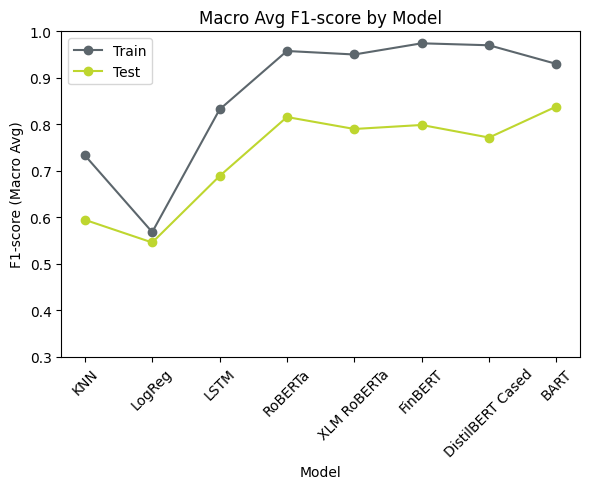

In [144]:
plot_metric(test_results_final, train_color= color_431, test_color= color_390, metric='f1-score', class_label='macroavg')

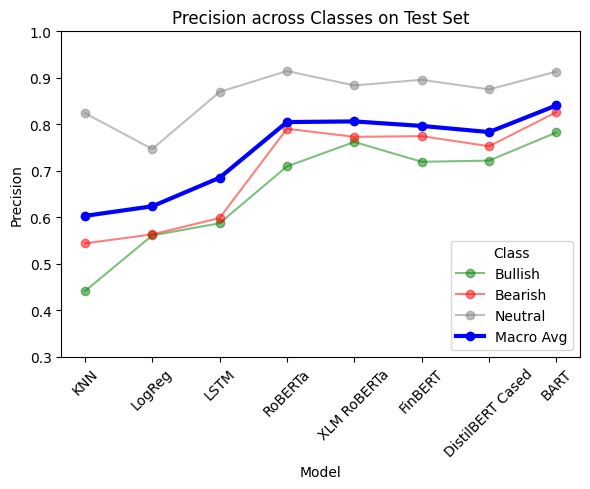

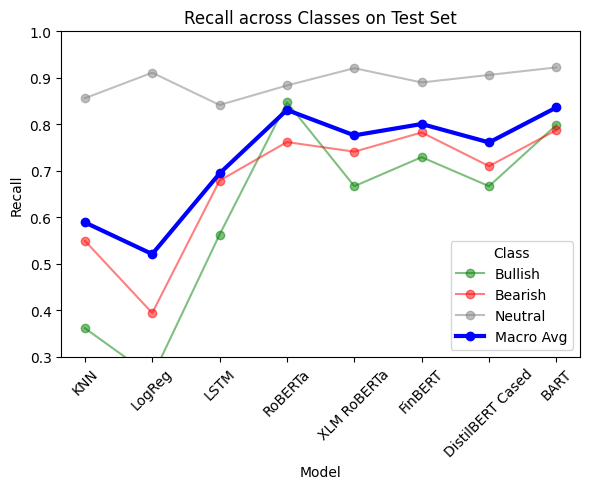

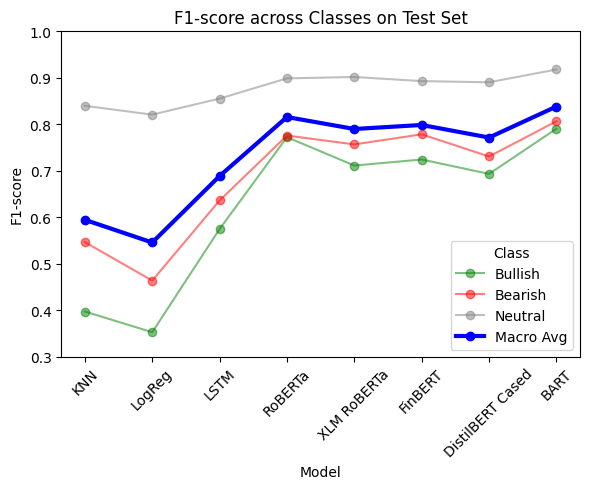

In [142]:
class_colors = {
    '0': (0.0, 0.5, 0.0, 0.5),  # Bullish: semi-transparent green
    '1': (1.0, 0.0, 0.0, 0.5),  # Bearish: semi-transparent red
    '2': (0.5, 0.5, 0.5, 0.5),  # Neutral: semi-transparent gray
    'macroavg': 'blue'          # Macro Avg: solid blue
}

for metric in ['precision', 'recall', 'f1-score']:
    plot_test_classes_across_models(test_results_final, metric=metric, class_colors=class_colors)